In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

In [11]:
def clean_data(path = "/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/folder_acciones"):
    files = os.listdir(path)
    df = pd.read_csv(path + "/" + files[0])
    df = df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
    df.columns = ["Date", files[0]]
    for file in files[1:]:
        stock_price = pd.read_csv(path + "/" + file)
        stock_price = stock_price.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
        stock_price.columns = ["Date", file]
        df = pd.merge(stock_price, df, how='left',on='Date')
    return df

In [12]:
def import_some_files(path = "/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/tipo_cambio"):
    files = os.listdir(path)
    dfs = []
    for file in files:
        some_df = pd.read_csv(path + "/" + file)
        dfs.append(some_df)
    return dfs

In [13]:
def merge_common_dates(dataframe, series):
    df = dataframe
    series = series.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
    df = pd.merge(df, series, how='left',on='Date')
    return df

In [14]:
path = ("/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/modified")
files = os.listdir(path)
BMV = pd.read_csv(path + "/" + files[0])

In [15]:
eur_usd, usd_mxn = import_some_files()

In [16]:
all_variables = merge_common_dates(BMV, eur_usd)
all_variables = merge_common_dates(all_variables, usd_mxn)

In [17]:
all_variables = all_variables.fillna(method='ffill')
all_variables = all_variables.fillna(0)

In [9]:
my_data_frame_sum = all_variables.iloc[:,1]
my_data_frame = all_variables.drop(['Date', 'Adj Close'], axis=1)

In [10]:
#my_data_frame.to_csv("theXs")      
#my_data_frame_sum.to_csv("theYs")

In [11]:
working_data = my_data_frame.iloc[0:1000]
working_data_sum = my_data_frame_sum.iloc[0:1000]
validate_data = my_data_frame.iloc[1000:]
validate_data_sum = my_data_frame_sum.iloc[1000:]

In [12]:
my_x = working_data.iloc[:,1:]
my_y = working_data_sum

In [18]:
import random
def next_batch2(dataframe, dataframe2, features):

    
    data = dataframe.values
    data2 = dataframe2.values

    X = data[:-1].reshape(len(data)-1,1,features)
    Y = data2[1:].reshape(len(data2)-1)
        
    return X, Y

In [16]:
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)

In [17]:
validateX, validateY = next_batch2(validate_data.iloc[:,1:], validate_data_sum, 36)

In [18]:
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras import backend as K; K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=32, inter_op_parallelism_threads=32)))

In [227]:
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

Train on 999 samples, validate on 999 samples
Epoch 1/10000
 - 3s - loss: 44.0964 - val_loss: 72.3683
Epoch 2/10000
 - 0s - loss: 43.0017 - val_loss: 73.1810
Epoch 3/10000
 - 0s - loss: 42.5084 - val_loss: 64.1145
Epoch 4/10000
 - 0s - loss: 42.7522 - val_loss: 67.0755
Epoch 5/10000
 - 0s - loss: 41.4765 - val_loss: 77.9708
Epoch 6/10000
 - 0s - loss: 42.2549 - val_loss: 67.8638
Epoch 7/10000
 - 0s - loss: 41.2994 - val_loss: 72.1397
Epoch 8/10000
 - 0s - loss: 41.1920 - val_loss: 60.9677
Epoch 9/10000
 - 0s - loss: 39.9312 - val_loss: 67.7854
Epoch 10/10000
 - 0s - loss: 41.5585 - val_loss: 54.5753
Epoch 11/10000
 - 0s - loss: 38.4401 - val_loss: 50.3230
Epoch 12/10000
 - 0s - loss: 38.5544 - val_loss: 55.4205
Epoch 13/10000
 - 1s - loss: 40.7186 - val_loss: 54.8937
Epoch 14/10000
 - 1s - loss: 38.6113 - val_loss: 61.4011
Epoch 15/10000
 - 1s - loss: 40.6498 - val_loss: 58.4040
Epoch 16/10000
 - 1s - loss: 37.8787 - val_loss: 56.2027
Epoch 17/10000
 - 0s - loss: 37.5241 - val_loss: 60

Epoch 144/10000
 - 0s - loss: 31.6643 - val_loss: 32.0854
Epoch 145/10000
 - 0s - loss: 30.9102 - val_loss: 34.9476
Epoch 146/10000
 - 0s - loss: 30.5908 - val_loss: 35.0354
Epoch 147/10000
 - 0s - loss: 30.8017 - val_loss: 34.9952
Epoch 148/10000
 - 0s - loss: 31.1939 - val_loss: 37.8229
Epoch 149/10000
 - 0s - loss: 31.4383 - val_loss: 36.0466
Epoch 150/10000
 - 0s - loss: 31.0522 - val_loss: 36.7430
Epoch 151/10000
 - 0s - loss: 31.1793 - val_loss: 36.7350
Epoch 152/10000
 - 0s - loss: 31.6794 - val_loss: 34.4304
Epoch 153/10000
 - 0s - loss: 31.2930 - val_loss: 38.0757
Epoch 154/10000
 - 0s - loss: 31.4869 - val_loss: 33.8338
Epoch 155/10000
 - 0s - loss: 30.9150 - val_loss: 37.1019
Epoch 156/10000
 - 0s - loss: 31.1161 - val_loss: 34.9755
Epoch 157/10000
 - 0s - loss: 30.2530 - val_loss: 35.4447
Epoch 158/10000
 - 0s - loss: 32.2953 - val_loss: 33.0970
Epoch 159/10000
 - 0s - loss: 32.3739 - val_loss: 34.5362
Epoch 160/10000
 - 0s - loss: 31.0756 - val_loss: 34.3924
Epoch 161/1000

 - 0s - loss: 23.6390 - val_loss: 22.2990
Epoch 286/10000
 - 0s - loss: 21.8676 - val_loss: 22.4258
Epoch 287/10000
 - 0s - loss: 23.1287 - val_loss: 19.6323
Epoch 288/10000
 - 0s - loss: 22.2312 - val_loss: 22.3452
Epoch 289/10000
 - 0s - loss: 21.9384 - val_loss: 20.8393
Epoch 290/10000
 - 0s - loss: 22.3878 - val_loss: 20.7277
Epoch 291/10000
 - 0s - loss: 23.3339 - val_loss: 21.5952
Epoch 292/10000
 - 0s - loss: 22.6030 - val_loss: 18.9909
Epoch 293/10000
 - 0s - loss: 22.3455 - val_loss: 19.6624
Epoch 294/10000
 - 0s - loss: 21.8505 - val_loss: 22.1318
Epoch 295/10000
 - 0s - loss: 22.2479 - val_loss: 21.1885
Epoch 296/10000
 - 0s - loss: 23.4731 - val_loss: 21.6659
Epoch 297/10000
 - 0s - loss: 21.8342 - val_loss: 19.9908
Epoch 298/10000
 - 0s - loss: 22.9868 - val_loss: 20.8672
Epoch 299/10000
 - 0s - loss: 24.8524 - val_loss: 21.1611
Epoch 300/10000
 - 0s - loss: 23.2577 - val_loss: 21.5578
Epoch 301/10000
 - 0s - loss: 21.9286 - val_loss: 22.4792
Epoch 302/10000
 - 0s - loss: 

Epoch 427/10000
 - 0s - loss: 22.1851 - val_loss: 17.3258
Epoch 428/10000
 - 0s - loss: 20.0135 - val_loss: 22.0397
Epoch 429/10000
 - 0s - loss: 20.1535 - val_loss: 17.8289
Epoch 430/10000
 - 0s - loss: 18.5490 - val_loss: 22.5493
Epoch 431/10000
 - 0s - loss: 19.6305 - val_loss: 16.6711
Epoch 432/10000
 - 0s - loss: 20.9477 - val_loss: 17.4615
Epoch 433/10000
 - 0s - loss: 20.8909 - val_loss: 23.9537
Epoch 434/10000
 - 0s - loss: 19.9023 - val_loss: 16.1060
Epoch 435/10000
 - 0s - loss: 19.9590 - val_loss: 17.7597
Epoch 436/10000
 - 0s - loss: 20.7713 - val_loss: 17.7567
Epoch 437/10000
 - 0s - loss: 19.2832 - val_loss: 17.5515
Epoch 438/10000
 - 0s - loss: 19.8664 - val_loss: 17.1342
Epoch 439/10000
 - 0s - loss: 23.1882 - val_loss: 25.1253
Epoch 440/10000
 - 0s - loss: 20.7002 - val_loss: 17.5060
Epoch 441/10000
 - 0s - loss: 20.3666 - val_loss: 17.3620
Epoch 442/10000
 - 0s - loss: 20.1677 - val_loss: 21.6820
Epoch 443/10000
 - 0s - loss: 20.3172 - val_loss: 17.4615
Epoch 444/1000

 - 0s - loss: 20.9988 - val_loss: 16.5561
Epoch 569/10000
 - 0s - loss: 19.5757 - val_loss: 17.4997
Epoch 570/10000
 - 0s - loss: 18.9487 - val_loss: 15.0461
Epoch 571/10000
 - 0s - loss: 17.6489 - val_loss: 16.3032
Epoch 572/10000
 - 0s - loss: 20.6377 - val_loss: 16.4630
Epoch 573/10000
 - 0s - loss: 20.9142 - val_loss: 17.7213
Epoch 574/10000
 - 0s - loss: 19.7115 - val_loss: 15.0747
Epoch 575/10000
 - 0s - loss: 18.0148 - val_loss: 16.8797
Epoch 576/10000
 - 0s - loss: 18.8901 - val_loss: 18.0249
Epoch 577/10000
 - 0s - loss: 21.7862 - val_loss: 15.4589
Epoch 578/10000
 - 0s - loss: 23.2227 - val_loss: 15.8009
Epoch 579/10000
 - 0s - loss: 19.6191 - val_loss: 17.0461
Epoch 580/10000
 - 0s - loss: 18.5936 - val_loss: 15.4753
Epoch 581/10000
 - 0s - loss: 18.6758 - val_loss: 17.9306
Epoch 582/10000
 - 0s - loss: 17.8593 - val_loss: 15.4749
Epoch 583/10000
 - 0s - loss: 17.9599 - val_loss: 15.5713
Epoch 584/10000
 - 0s - loss: 24.6410 - val_loss: 24.3242
Epoch 585/10000
 - 0s - loss: 

Epoch 710/10000
 - 0s - loss: 16.4181 - val_loss: 15.9804
Epoch 711/10000
 - 0s - loss: 19.8157 - val_loss: 14.9207
Epoch 712/10000
 - 0s - loss: 19.2777 - val_loss: 16.8904
Epoch 713/10000
 - 0s - loss: 18.2050 - val_loss: 16.4437
Epoch 714/10000
 - 0s - loss: 18.8875 - val_loss: 15.5379
Epoch 715/10000
 - 0s - loss: 17.2856 - val_loss: 15.0748
Epoch 716/10000
 - 0s - loss: 18.8486 - val_loss: 14.7618
Epoch 717/10000
 - 0s - loss: 18.3258 - val_loss: 16.8790
Epoch 718/10000
 - 0s - loss: 17.2980 - val_loss: 17.0658
Epoch 719/10000
 - 0s - loss: 19.4271 - val_loss: 15.7987
Epoch 720/10000
 - 0s - loss: 16.9796 - val_loss: 15.8246
Epoch 721/10000
 - 0s - loss: 17.7486 - val_loss: 15.6956
Epoch 722/10000
 - 0s - loss: 18.7585 - val_loss: 15.0154
Epoch 723/10000
 - 0s - loss: 18.1415 - val_loss: 14.7988
Epoch 724/10000
 - 0s - loss: 19.6170 - val_loss: 14.9305
Epoch 725/10000
 - 0s - loss: 17.1902 - val_loss: 15.0017
Epoch 726/10000
 - 0s - loss: 18.6853 - val_loss: 15.3326
Epoch 727/1000

 - 1s - loss: 17.3244 - val_loss: 18.3092
Epoch 852/10000
 - 1s - loss: 18.0430 - val_loss: 13.7966
Epoch 853/10000
 - 1s - loss: 17.9301 - val_loss: 15.2362
Epoch 854/10000
 - 1s - loss: 16.5879 - val_loss: 14.4962
Epoch 855/10000
 - 1s - loss: 16.7992 - val_loss: 16.3801
Epoch 856/10000
 - 1s - loss: 17.0643 - val_loss: 14.7424
Epoch 857/10000
 - 1s - loss: 16.6650 - val_loss: 13.8775
Epoch 858/10000
 - 1s - loss: 18.3489 - val_loss: 15.1691
Epoch 859/10000
 - 1s - loss: 19.0265 - val_loss: 14.8223
Epoch 860/10000
 - 1s - loss: 20.0353 - val_loss: 16.9066
Epoch 861/10000
 - 1s - loss: 18.3412 - val_loss: 16.8754
Epoch 862/10000
 - 1s - loss: 17.2791 - val_loss: 14.7446
Epoch 863/10000
 - 1s - loss: 18.7378 - val_loss: 15.1738
Epoch 864/10000
 - 1s - loss: 15.9620 - val_loss: 19.3349
Epoch 865/10000
 - 1s - loss: 19.3965 - val_loss: 15.7172
Epoch 866/10000
 - 1s - loss: 18.0582 - val_loss: 15.1694
Epoch 867/10000
 - 1s - loss: 18.3376 - val_loss: 15.6401
Epoch 868/10000
 - 1s - loss: 

Epoch 993/10000
 - 1s - loss: 16.9967 - val_loss: 13.5277
Epoch 994/10000
 - 1s - loss: 16.8967 - val_loss: 14.8026
Epoch 995/10000
 - 1s - loss: 16.8965 - val_loss: 15.5437
Epoch 996/10000
 - 1s - loss: 17.0455 - val_loss: 13.6653
Epoch 997/10000
 - 1s - loss: 17.1240 - val_loss: 14.1162
Epoch 998/10000
 - 2s - loss: 16.2739 - val_loss: 13.4536
Epoch 999/10000
 - 1s - loss: 16.4974 - val_loss: 14.2184
Epoch 1000/10000
 - 1s - loss: 16.6865 - val_loss: 14.9440
Epoch 1001/10000
 - 1s - loss: 16.5229 - val_loss: 15.3860
Epoch 1002/10000
 - 1s - loss: 18.1696 - val_loss: 14.1815
Epoch 1003/10000
 - 1s - loss: 20.2478 - val_loss: 17.2070
Epoch 1004/10000
 - 1s - loss: 18.4739 - val_loss: 13.8255
Epoch 1005/10000
 - 1s - loss: 19.1855 - val_loss: 13.7080
Epoch 1006/10000
 - 1s - loss: 17.2535 - val_loss: 13.4550
Epoch 1007/10000
 - 1s - loss: 17.0549 - val_loss: 13.3967
Epoch 1008/10000
 - 1s - loss: 18.5461 - val_loss: 13.9060
Epoch 1009/10000
 - 1s - loss: 16.6306 - val_loss: 13.4544
Epoc

Epoch 1132/10000
 - 1s - loss: 15.7296 - val_loss: 13.3248
Epoch 1133/10000
 - 1s - loss: 17.8573 - val_loss: 13.9254
Epoch 1134/10000
 - 1s - loss: 16.9023 - val_loss: 13.9656
Epoch 1135/10000
 - 1s - loss: 15.7363 - val_loss: 14.4528
Epoch 1136/10000
 - 1s - loss: 17.4336 - val_loss: 13.9012
Epoch 1137/10000
 - 1s - loss: 17.0760 - val_loss: 14.8225
Epoch 1138/10000
 - 1s - loss: 17.7056 - val_loss: 14.4444
Epoch 1139/10000
 - 1s - loss: 15.4508 - val_loss: 13.9134
Epoch 1140/10000
 - 1s - loss: 16.6100 - val_loss: 14.0939
Epoch 1141/10000
 - 1s - loss: 16.6663 - val_loss: 13.6702
Epoch 1142/10000
 - 1s - loss: 16.9644 - val_loss: 13.3243
Epoch 1143/10000
 - 1s - loss: 20.1267 - val_loss: 15.7000
Epoch 1144/10000
 - 1s - loss: 18.4139 - val_loss: 15.9562
Epoch 1145/10000
 - 1s - loss: 19.3486 - val_loss: 14.4616
Epoch 1146/10000
 - 1s - loss: 17.6879 - val_loss: 14.8043
Epoch 1147/10000
 - 1s - loss: 16.2453 - val_loss: 13.2734
Epoch 1148/10000
 - 1s - loss: 16.2043 - val_loss: 14.30

Epoch 1271/10000
 - 1s - loss: 16.2327 - val_loss: 14.5284
Epoch 1272/10000
 - 1s - loss: 17.7823 - val_loss: 16.0044
Epoch 1273/10000
 - 1s - loss: 16.4229 - val_loss: 13.0424
Epoch 1274/10000
 - 1s - loss: 16.9683 - val_loss: 14.1129
Epoch 1275/10000
 - 1s - loss: 15.6075 - val_loss: 13.9504
Epoch 1276/10000
 - 1s - loss: 17.5955 - val_loss: 13.7873
Epoch 1277/10000
 - 1s - loss: 15.9136 - val_loss: 13.3082
Epoch 1278/10000
 - 1s - loss: 16.0664 - val_loss: 13.7191
Epoch 1279/10000
 - 1s - loss: 19.4315 - val_loss: 13.6100
Epoch 1280/10000
 - 1s - loss: 18.3197 - val_loss: 13.4080
Epoch 1281/10000
 - 1s - loss: 18.0925 - val_loss: 14.6514
Epoch 1282/10000
 - 1s - loss: 16.5588 - val_loss: 13.6074
Epoch 1283/10000
 - 1s - loss: 15.9028 - val_loss: 13.3020
Epoch 1284/10000
 - 1s - loss: 16.9414 - val_loss: 13.5539
Epoch 1285/10000
 - 1s - loss: 15.9915 - val_loss: 13.6323
Epoch 1286/10000
 - 1s - loss: 15.9009 - val_loss: 14.0406
Epoch 1287/10000
 - 1s - loss: 16.2549 - val_loss: 13.89

Epoch 1410/10000
 - 1s - loss: 16.5590 - val_loss: 14.1683
Epoch 1411/10000
 - 1s - loss: 17.2582 - val_loss: 13.5109
Epoch 1412/10000
 - 1s - loss: 15.7451 - val_loss: 14.3647
Epoch 1413/10000
 - 1s - loss: 16.8529 - val_loss: 14.1492
Epoch 1414/10000
 - 1s - loss: 16.6367 - val_loss: 13.2955
Epoch 1415/10000
 - 1s - loss: 16.2282 - val_loss: 12.8949
Epoch 1416/10000
 - 1s - loss: 16.2348 - val_loss: 13.3806
Epoch 1417/10000
 - 1s - loss: 17.7429 - val_loss: 13.1853
Epoch 1418/10000
 - 1s - loss: 16.1918 - val_loss: 13.8618
Epoch 1419/10000
 - 1s - loss: 16.8698 - val_loss: 14.1104
Epoch 1420/10000
 - 1s - loss: 16.8602 - val_loss: 14.5412
Epoch 1421/10000
 - 1s - loss: 16.5850 - val_loss: 13.0898
Epoch 1422/10000
 - 1s - loss: 15.8783 - val_loss: 13.3246
Epoch 1423/10000
 - 1s - loss: 16.5606 - val_loss: 13.0171
Epoch 1424/10000
 - 1s - loss: 15.9611 - val_loss: 13.9163
Epoch 1425/10000
 - 1s - loss: 17.5486 - val_loss: 13.5054
Epoch 1426/10000
 - 1s - loss: 16.6798 - val_loss: 13.22

Epoch 1549/10000
 - 1s - loss: 17.0261 - val_loss: 13.2788
Epoch 1550/10000
 - 1s - loss: 15.2225 - val_loss: 12.7683
Epoch 1551/10000
 - 1s - loss: 16.6348 - val_loss: 13.3852
Epoch 1552/10000
 - 1s - loss: 15.2995 - val_loss: 13.1778
Epoch 1553/10000
 - 1s - loss: 17.6486 - val_loss: 13.1314
Epoch 1554/10000
 - 1s - loss: 17.4952 - val_loss: 13.3655
Epoch 1555/10000
 - 1s - loss: 17.0221 - val_loss: 13.2548
Epoch 1556/10000
 - 1s - loss: 19.5533 - val_loss: 13.3242
Epoch 1557/10000
 - 1s - loss: 15.2776 - val_loss: 12.9743
Epoch 1558/10000
 - 1s - loss: 16.0755 - val_loss: 13.1807
Epoch 1559/10000
 - 1s - loss: 18.0268 - val_loss: 12.9756
Epoch 1560/10000
 - 1s - loss: 17.0863 - val_loss: 13.3534
Epoch 1561/10000
 - 1s - loss: 16.4067 - val_loss: 13.4633
Epoch 1562/10000
 - 1s - loss: 16.5804 - val_loss: 14.4279
Epoch 1563/10000
 - 1s - loss: 16.1523 - val_loss: 12.9094
Epoch 1564/10000
 - 1s - loss: 17.5967 - val_loss: 13.6030
Epoch 1565/10000
 - 1s - loss: 16.1693 - val_loss: 13.01

Epoch 1688/10000
 - 1s - loss: 17.0886 - val_loss: 13.1982
Epoch 1689/10000
 - 1s - loss: 15.5232 - val_loss: 13.7624
Epoch 1690/10000
 - 1s - loss: 15.1064 - val_loss: 13.2055
Epoch 1691/10000
 - 1s - loss: 17.2451 - val_loss: 14.4732
Epoch 1692/10000
 - 1s - loss: 16.8167 - val_loss: 13.5170
Epoch 1693/10000
 - 1s - loss: 15.9313 - val_loss: 13.7820
Epoch 1694/10000
 - 1s - loss: 16.5597 - val_loss: 13.2585
Epoch 1695/10000
 - 1s - loss: 17.0512 - val_loss: 13.5000
Epoch 1696/10000
 - 1s - loss: 19.0152 - val_loss: 14.7331
Epoch 1697/10000
 - 1s - loss: 16.8363 - val_loss: 12.6829
Epoch 1698/10000
 - 1s - loss: 16.4403 - val_loss: 14.0043
Epoch 1699/10000
 - 1s - loss: 16.3804 - val_loss: 13.2043
Epoch 1700/10000
 - 1s - loss: 16.0282 - val_loss: 12.8661
Epoch 1701/10000
 - 1s - loss: 17.8704 - val_loss: 12.8152
Epoch 1702/10000
 - 1s - loss: 16.4390 - val_loss: 12.9990
Epoch 1703/10000
 - 1s - loss: 17.9538 - val_loss: 12.8871
Epoch 1704/10000
 - 1s - loss: 18.2653 - val_loss: 12.72

Epoch 1827/10000
 - 1s - loss: 16.5251 - val_loss: 12.6888
Epoch 1828/10000
 - 1s - loss: 15.8383 - val_loss: 13.8046
Epoch 1829/10000
 - 1s - loss: 15.0346 - val_loss: 13.5431
Epoch 1830/10000
 - 1s - loss: 16.4931 - val_loss: 13.2645
Epoch 1831/10000
 - 1s - loss: 16.3694 - val_loss: 13.3972
Epoch 1832/10000
 - 1s - loss: 16.2278 - val_loss: 13.7943
Epoch 1833/10000
 - 1s - loss: 15.1232 - val_loss: 12.8429
Epoch 1834/10000
 - 1s - loss: 16.6490 - val_loss: 15.1031
Epoch 1835/10000
 - 1s - loss: 16.7276 - val_loss: 13.8249
Epoch 1836/10000
 - 1s - loss: 16.4356 - val_loss: 14.3917
Epoch 1837/10000
 - 1s - loss: 16.0629 - val_loss: 13.1122
Epoch 1838/10000
 - 1s - loss: 16.4175 - val_loss: 13.0080
Epoch 1839/10000
 - 1s - loss: 16.4720 - val_loss: 13.1544
Epoch 1840/10000
 - 1s - loss: 15.3106 - val_loss: 13.7044
Epoch 1841/10000
 - 1s - loss: 16.3170 - val_loss: 14.2032
Epoch 1842/10000
 - 1s - loss: 15.5128 - val_loss: 13.3815
Epoch 1843/10000
 - 1s - loss: 18.6783 - val_loss: 16.23

Epoch 1966/10000
 - 1s - loss: 16.5143 - val_loss: 12.6374
Epoch 1967/10000
 - 1s - loss: 14.8715 - val_loss: 13.9791
Epoch 1968/10000
 - 1s - loss: 16.8773 - val_loss: 13.9431
Epoch 1969/10000
 - 1s - loss: 16.5249 - val_loss: 13.3092
Epoch 1970/10000
 - 1s - loss: 16.1431 - val_loss: 13.2112
Epoch 1971/10000
 - 1s - loss: 17.0861 - val_loss: 16.0472
Epoch 1972/10000
 - 1s - loss: 16.1661 - val_loss: 15.6302
Epoch 1973/10000
 - 1s - loss: 16.3221 - val_loss: 14.1326
Epoch 1974/10000
 - 1s - loss: 16.3391 - val_loss: 12.6726
Epoch 1975/10000
 - 1s - loss: 17.3578 - val_loss: 15.7216
Epoch 1976/10000
 - 1s - loss: 15.8857 - val_loss: 13.2019
Epoch 1977/10000
 - 1s - loss: 15.5657 - val_loss: 12.9728
Epoch 1978/10000
 - 1s - loss: 15.9922 - val_loss: 13.4900
Epoch 1979/10000
 - 1s - loss: 16.7558 - val_loss: 13.9323
Epoch 1980/10000
 - 1s - loss: 17.5794 - val_loss: 13.4865
Epoch 1981/10000
 - 1s - loss: 16.2582 - val_loss: 12.5084
Epoch 1982/10000
 - 1s - loss: 16.2352 - val_loss: 12.85

Epoch 2105/10000
 - 1s - loss: 16.3910 - val_loss: 14.1425
Epoch 2106/10000
 - 1s - loss: 16.4278 - val_loss: 12.9831
Epoch 2107/10000
 - 1s - loss: 16.9466 - val_loss: 12.5224
Epoch 2108/10000
 - 1s - loss: 16.4444 - val_loss: 12.7474
Epoch 2109/10000
 - 1s - loss: 17.1802 - val_loss: 12.5832
Epoch 2110/10000
 - 1s - loss: 15.8250 - val_loss: 13.2914
Epoch 2111/10000
 - 1s - loss: 15.4794 - val_loss: 12.5995
Epoch 2112/10000
 - 1s - loss: 16.4132 - val_loss: 14.2875
Epoch 2113/10000
 - 1s - loss: 16.8284 - val_loss: 12.6217
Epoch 2114/10000
 - 1s - loss: 16.3578 - val_loss: 12.8249
Epoch 2115/10000
 - 1s - loss: 16.2036 - val_loss: 12.6271
Epoch 2116/10000
 - 1s - loss: 15.4354 - val_loss: 13.1148
Epoch 2117/10000
 - 1s - loss: 16.3010 - val_loss: 13.1259
Epoch 2118/10000
 - 1s - loss: 16.0161 - val_loss: 14.7431
Epoch 2119/10000
 - 1s - loss: 15.6714 - val_loss: 13.5283
Epoch 2120/10000
 - 1s - loss: 16.3034 - val_loss: 13.4657
Epoch 2121/10000
 - 1s - loss: 16.4002 - val_loss: 18.41

Epoch 2244/10000
 - 1s - loss: 16.3161 - val_loss: 12.2685
Epoch 2245/10000
 - 1s - loss: 15.3524 - val_loss: 12.2241
Epoch 2246/10000
 - 1s - loss: 15.6549 - val_loss: 13.0623
Epoch 2247/10000
 - 1s - loss: 16.4439 - val_loss: 13.1965
Epoch 2248/10000
 - 1s - loss: 14.7114 - val_loss: 12.8113
Epoch 2249/10000
 - 1s - loss: 16.4901 - val_loss: 12.3303
Epoch 2250/10000
 - 1s - loss: 18.5717 - val_loss: 13.2842
Epoch 2251/10000
 - 1s - loss: 16.7852 - val_loss: 12.8865
Epoch 2252/10000
 - 1s - loss: 17.0249 - val_loss: 17.9137
Epoch 2253/10000
 - 1s - loss: 18.5796 - val_loss: 12.9423
Epoch 2254/10000
 - 1s - loss: 16.1351 - val_loss: 13.2861
Epoch 2255/10000
 - 1s - loss: 15.0717 - val_loss: 13.0404
Epoch 2256/10000
 - 1s - loss: 15.9205 - val_loss: 12.8987
Epoch 2257/10000
 - 1s - loss: 15.3147 - val_loss: 12.9760
Epoch 2258/10000
 - 1s - loss: 16.2013 - val_loss: 13.8129
Epoch 2259/10000
 - 1s - loss: 16.4487 - val_loss: 12.6993
Epoch 2260/10000
 - 1s - loss: 15.6582 - val_loss: 13.17

Epoch 2383/10000
 - 1s - loss: 15.5871 - val_loss: 12.7258
Epoch 2384/10000
 - 1s - loss: 15.2236 - val_loss: 12.4998
Epoch 2385/10000
 - 1s - loss: 15.8109 - val_loss: 14.4938
Epoch 2386/10000
 - 1s - loss: 15.8902 - val_loss: 14.2853
Epoch 2387/10000
 - 1s - loss: 16.6220 - val_loss: 17.4307
Epoch 2388/10000
 - 1s - loss: 16.9611 - val_loss: 13.8701
Epoch 2389/10000
 - 1s - loss: 16.2753 - val_loss: 13.4079
Epoch 2390/10000
 - 1s - loss: 17.6578 - val_loss: 14.2940
Epoch 2391/10000
 - 1s - loss: 18.3518 - val_loss: 13.5801
Epoch 2392/10000
 - 1s - loss: 21.8007 - val_loss: 14.6476
Epoch 2393/10000
 - 1s - loss: 18.1171 - val_loss: 14.2523
Epoch 2394/10000
 - 1s - loss: 17.2136 - val_loss: 13.8647
Epoch 2395/10000
 - 1s - loss: 19.7003 - val_loss: 14.1699
Epoch 2396/10000
 - 1s - loss: 17.7655 - val_loss: 14.9862
Epoch 2397/10000
 - 1s - loss: 18.8093 - val_loss: 13.9900
Epoch 2398/10000
 - 1s - loss: 17.6197 - val_loss: 14.5837
Epoch 2399/10000
 - 1s - loss: 16.7139 - val_loss: 18.72

Epoch 2522/10000
 - 1s - loss: 15.5220 - val_loss: 12.9222
Epoch 2523/10000
 - 1s - loss: 15.1829 - val_loss: 13.0658
Epoch 2524/10000
 - 1s - loss: 15.3545 - val_loss: 12.8713
Epoch 2525/10000
 - 1s - loss: 15.2424 - val_loss: 12.7768
Epoch 2526/10000
 - 1s - loss: 16.7548 - val_loss: 13.9847
Epoch 2527/10000
 - 1s - loss: 16.8637 - val_loss: 13.7176
Epoch 2528/10000
 - 1s - loss: 18.5486 - val_loss: 13.7435
Epoch 2529/10000
 - 1s - loss: 17.1401 - val_loss: 13.0506
Epoch 2530/10000
 - 1s - loss: 15.9193 - val_loss: 13.4565
Epoch 2531/10000
 - 1s - loss: 16.8585 - val_loss: 13.0198
Epoch 2532/10000
 - 1s - loss: 16.8886 - val_loss: 13.3080
Epoch 2533/10000
 - 1s - loss: 16.3802 - val_loss: 12.8254
Epoch 2534/10000
 - 1s - loss: 15.9375 - val_loss: 13.6466
Epoch 2535/10000
 - 1s - loss: 15.6970 - val_loss: 13.5956
Epoch 2536/10000
 - 1s - loss: 16.0082 - val_loss: 12.9461
Epoch 2537/10000
 - 1s - loss: 17.2936 - val_loss: 12.8236
Epoch 2538/10000
 - 1s - loss: 17.7964 - val_loss: 12.88

Epoch 2661/10000
 - 1s - loss: 15.6854 - val_loss: 13.0683
Epoch 2662/10000
 - 1s - loss: 16.1833 - val_loss: 12.8915
Epoch 2663/10000
 - 1s - loss: 14.6596 - val_loss: 12.9427
Epoch 2664/10000
 - 1s - loss: 15.4976 - val_loss: 12.5508
Epoch 2665/10000
 - 1s - loss: 15.7301 - val_loss: 13.9591
Epoch 2666/10000
 - 1s - loss: 17.7058 - val_loss: 13.2730
Epoch 2667/10000
 - 1s - loss: 16.1329 - val_loss: 13.3175
Epoch 2668/10000
 - 1s - loss: 15.6084 - val_loss: 13.9878
Epoch 2669/10000
 - 1s - loss: 16.1877 - val_loss: 12.4872
Epoch 2670/10000
 - 1s - loss: 18.8046 - val_loss: 13.3719
Epoch 2671/10000
 - 1s - loss: 16.1628 - val_loss: 13.3674
Epoch 2672/10000
 - 1s - loss: 18.3185 - val_loss: 13.7691
Epoch 2673/10000
 - 1s - loss: 16.2741 - val_loss: 12.7794
Epoch 2674/10000
 - 1s - loss: 16.7443 - val_loss: 15.7985
Epoch 2675/10000
 - 1s - loss: 16.3078 - val_loss: 13.4934
Epoch 2676/10000
 - 1s - loss: 16.2968 - val_loss: 13.1377
Epoch 2677/10000
 - 1s - loss: 15.3029 - val_loss: 13.17

Epoch 2800/10000
 - 1s - loss: 15.6645 - val_loss: 12.0429
Epoch 2801/10000
 - 1s - loss: 15.1285 - val_loss: 12.9916
Epoch 2802/10000
 - 1s - loss: 16.7537 - val_loss: 12.8815
Epoch 2803/10000
 - 1s - loss: 16.2808 - val_loss: 12.7668
Epoch 2804/10000
 - 1s - loss: 16.4325 - val_loss: 13.6522
Epoch 2805/10000
 - 1s - loss: 17.8762 - val_loss: 12.7886
Epoch 2806/10000
 - 1s - loss: 15.9530 - val_loss: 12.2832
Epoch 2807/10000
 - 1s - loss: 15.4689 - val_loss: 12.2785
Epoch 2808/10000
 - 1s - loss: 17.3899 - val_loss: 13.8409
Epoch 2809/10000
 - 1s - loss: 18.0387 - val_loss: 12.9305
Epoch 2810/10000
 - 1s - loss: 15.1098 - val_loss: 12.9472
Epoch 2811/10000
 - 1s - loss: 15.9197 - val_loss: 14.2545
Epoch 2812/10000
 - 1s - loss: 15.8178 - val_loss: 12.4512
Epoch 2813/10000
 - 1s - loss: 15.6736 - val_loss: 12.4881
Epoch 2814/10000
 - 1s - loss: 15.1102 - val_loss: 12.3006
Epoch 2815/10000
 - 1s - loss: 15.9215 - val_loss: 12.2710
Epoch 2816/10000
 - 1s - loss: 16.1250 - val_loss: 13.01

Epoch 2939/10000
 - 2s - loss: 16.1726 - val_loss: 12.1828
Epoch 2940/10000
 - 1s - loss: 16.3272 - val_loss: 12.3898
Epoch 2941/10000
 - 1s - loss: 15.3102 - val_loss: 13.0347
Epoch 2942/10000
 - 1s - loss: 17.1590 - val_loss: 13.4417
Epoch 2943/10000
 - 1s - loss: 17.9982 - val_loss: 12.9565
Epoch 2944/10000
 - 1s - loss: 16.1018 - val_loss: 13.2044
Epoch 2945/10000
 - 1s - loss: 17.4896 - val_loss: 12.6178
Epoch 2946/10000
 - 1s - loss: 15.6425 - val_loss: 12.3463
Epoch 2947/10000
 - 1s - loss: 14.8980 - val_loss: 12.0589
Epoch 2948/10000
 - 1s - loss: 15.7651 - val_loss: 12.7608
Epoch 2949/10000
 - 1s - loss: 16.6477 - val_loss: 12.1711
Epoch 2950/10000
 - 1s - loss: 15.6722 - val_loss: 12.1938
Epoch 2951/10000
 - 1s - loss: 16.9858 - val_loss: 12.7118
Epoch 2952/10000
 - 1s - loss: 16.0402 - val_loss: 16.3011
Epoch 2953/10000
 - 1s - loss: 16.0837 - val_loss: 12.7140
Epoch 2954/10000
 - 1s - loss: 16.6846 - val_loss: 12.6408
Epoch 2955/10000
 - 1s - loss: 17.1447 - val_loss: 12.35

Epoch 3078/10000
 - 1s - loss: 17.5880 - val_loss: 13.1682
Epoch 3079/10000
 - 1s - loss: 17.8082 - val_loss: 12.3156
Epoch 3080/10000
 - 1s - loss: 15.5957 - val_loss: 12.5923
Epoch 3081/10000
 - 1s - loss: 17.0103 - val_loss: 12.3960
Epoch 3082/10000
 - 1s - loss: 14.9365 - val_loss: 12.4112
Epoch 3083/10000
 - 1s - loss: 15.8261 - val_loss: 12.3031
Epoch 3084/10000
 - 1s - loss: 16.1368 - val_loss: 12.3310
Epoch 3085/10000
 - 1s - loss: 15.4749 - val_loss: 12.5316
Epoch 3086/10000
 - 1s - loss: 15.4519 - val_loss: 12.6509
Epoch 3087/10000
 - 1s - loss: 16.9192 - val_loss: 14.9383
Epoch 3088/10000
 - 1s - loss: 16.9524 - val_loss: 12.6500
Epoch 3089/10000
 - 1s - loss: 15.4196 - val_loss: 13.0239
Epoch 3090/10000
 - 1s - loss: 16.3751 - val_loss: 13.6836
Epoch 3091/10000
 - 1s - loss: 15.4710 - val_loss: 13.0782
Epoch 3092/10000
 - 1s - loss: 16.4581 - val_loss: 12.5163
Epoch 3093/10000
 - 1s - loss: 16.0484 - val_loss: 13.6310
Epoch 3094/10000
 - 1s - loss: 15.8304 - val_loss: 15.02

Epoch 3217/10000
 - 1s - loss: 16.2814 - val_loss: 12.2938
Epoch 3218/10000
 - 1s - loss: 15.8404 - val_loss: 12.3618
Epoch 3219/10000
 - 1s - loss: 15.7029 - val_loss: 11.9902
Epoch 3220/10000
 - 1s - loss: 14.9470 - val_loss: 12.4196
Epoch 3221/10000
 - 1s - loss: 17.7478 - val_loss: 14.7014
Epoch 3222/10000
 - 1s - loss: 15.8058 - val_loss: 12.5349
Epoch 3223/10000
 - 1s - loss: 15.8152 - val_loss: 12.1511
Epoch 3224/10000
 - 1s - loss: 15.5088 - val_loss: 12.3449
Epoch 3225/10000
 - 1s - loss: 16.0079 - val_loss: 12.6140
Epoch 3226/10000
 - 1s - loss: 16.1497 - val_loss: 12.4909
Epoch 3227/10000
 - 1s - loss: 16.0873 - val_loss: 12.2851
Epoch 3228/10000
 - 1s - loss: 15.9753 - val_loss: 13.2622
Epoch 3229/10000
 - 1s - loss: 15.4484 - val_loss: 12.8475
Epoch 3230/10000
 - 1s - loss: 16.3002 - val_loss: 12.4644
Epoch 3231/10000
 - 1s - loss: 15.7458 - val_loss: 13.4289
Epoch 3232/10000
 - 1s - loss: 15.1653 - val_loss: 12.4128
Epoch 3233/10000
 - 1s - loss: 16.8383 - val_loss: 11.94

Epoch 3356/10000
 - 1s - loss: 17.0594 - val_loss: 13.5366
Epoch 3357/10000
 - 1s - loss: 16.0632 - val_loss: 13.4684
Epoch 3358/10000
 - 1s - loss: 17.2628 - val_loss: 13.3366
Epoch 3359/10000
 - 1s - loss: 16.7432 - val_loss: 12.5509
Epoch 3360/10000
 - 1s - loss: 15.4835 - val_loss: 13.9205
Epoch 3361/10000
 - 1s - loss: 17.2163 - val_loss: 12.5950
Epoch 3362/10000
 - 1s - loss: 15.4338 - val_loss: 12.2822
Epoch 3363/10000
 - 1s - loss: 18.0122 - val_loss: 12.2917
Epoch 3364/10000
 - 1s - loss: 17.6297 - val_loss: 13.3242
Epoch 3365/10000
 - 1s - loss: 15.5209 - val_loss: 12.5709
Epoch 3366/10000
 - 1s - loss: 15.6895 - val_loss: 13.6735
Epoch 3367/10000
 - 1s - loss: 15.8014 - val_loss: 13.0112
Epoch 3368/10000
 - 1s - loss: 14.9638 - val_loss: 12.2066
Epoch 3369/10000
 - 1s - loss: 16.4255 - val_loss: 12.0121
Epoch 3370/10000
 - 1s - loss: 14.8901 - val_loss: 12.1869
Epoch 3371/10000
 - 1s - loss: 16.4719 - val_loss: 13.3664
Epoch 3372/10000
 - 1s - loss: 16.4526 - val_loss: 12.83

Epoch 3495/10000
 - 1s - loss: 16.5018 - val_loss: 12.1479
Epoch 3496/10000
 - 1s - loss: 15.5490 - val_loss: 13.0732
Epoch 3497/10000
 - 1s - loss: 15.3638 - val_loss: 12.2123
Epoch 3498/10000
 - 1s - loss: 14.4685 - val_loss: 12.5040
Epoch 3499/10000
 - 1s - loss: 16.6266 - val_loss: 11.8180
Epoch 3500/10000
 - 1s - loss: 14.8889 - val_loss: 12.3291
Epoch 3501/10000
 - 1s - loss: 14.6840 - val_loss: 12.3261
Epoch 3502/10000
 - 1s - loss: 16.5881 - val_loss: 11.9221
Epoch 3503/10000
 - 1s - loss: 17.1104 - val_loss: 11.8960
Epoch 3504/10000
 - 1s - loss: 14.7508 - val_loss: 12.0391
Epoch 3505/10000
 - 1s - loss: 14.8041 - val_loss: 12.0624
Epoch 3506/10000
 - 1s - loss: 16.1313 - val_loss: 13.4823
Epoch 3507/10000
 - 1s - loss: 15.0256 - val_loss: 13.0381
Epoch 3508/10000
 - 1s - loss: 15.5389 - val_loss: 12.4681
Epoch 3509/10000
 - 1s - loss: 15.8106 - val_loss: 12.4003
Epoch 3510/10000
 - 1s - loss: 16.4971 - val_loss: 13.9913
Epoch 3511/10000
 - 1s - loss: 16.4195 - val_loss: 12.17

Epoch 3634/10000
 - 1s - loss: 15.9196 - val_loss: 12.9081
Epoch 3635/10000
 - 1s - loss: 15.2120 - val_loss: 12.1138
Epoch 3636/10000
 - 1s - loss: 15.2499 - val_loss: 14.1788
Epoch 3637/10000
 - 1s - loss: 16.1830 - val_loss: 12.8502
Epoch 3638/10000
 - 1s - loss: 15.8558 - val_loss: 13.9949
Epoch 3639/10000
 - 1s - loss: 15.2734 - val_loss: 13.7300
Epoch 3640/10000
 - 1s - loss: 15.3403 - val_loss: 12.8856
Epoch 3641/10000
 - 1s - loss: 15.7717 - val_loss: 12.0953
Epoch 3642/10000
 - 1s - loss: 14.6877 - val_loss: 12.6452
Epoch 3643/10000
 - 1s - loss: 16.1940 - val_loss: 12.0612
Epoch 3644/10000
 - 1s - loss: 14.5207 - val_loss: 15.3802
Epoch 3645/10000
 - 1s - loss: 15.1572 - val_loss: 13.4597
Epoch 3646/10000
 - 1s - loss: 17.7581 - val_loss: 12.2695
Epoch 3647/10000
 - 1s - loss: 15.4634 - val_loss: 14.3839
Epoch 3648/10000
 - 1s - loss: 15.0166 - val_loss: 12.1208
Epoch 3649/10000
 - 1s - loss: 15.2796 - val_loss: 13.0759
Epoch 3650/10000
 - 1s - loss: 15.7716 - val_loss: 11.99

Epoch 3773/10000
 - 1s - loss: 14.5201 - val_loss: 12.3796
Epoch 3774/10000
 - 1s - loss: 17.3544 - val_loss: 12.0732
Epoch 3775/10000
 - 1s - loss: 16.1146 - val_loss: 14.5741
Epoch 3776/10000
 - 1s - loss: 16.3882 - val_loss: 13.5569
Epoch 3777/10000
 - 1s - loss: 15.9720 - val_loss: 12.4619
Epoch 3778/10000
 - 1s - loss: 15.7352 - val_loss: 12.5763
Epoch 3779/10000
 - 1s - loss: 15.0637 - val_loss: 12.8042
Epoch 3780/10000
 - 1s - loss: 15.2858 - val_loss: 13.5561
Epoch 3781/10000
 - 1s - loss: 15.7519 - val_loss: 13.2280
Epoch 3782/10000
 - 1s - loss: 14.8350 - val_loss: 14.4592
Epoch 3783/10000
 - 1s - loss: 15.4609 - val_loss: 12.8848
Epoch 3784/10000
 - 1s - loss: 15.0953 - val_loss: 12.1255
Epoch 3785/10000
 - 1s - loss: 15.4037 - val_loss: 13.4122
Epoch 3786/10000
 - 1s - loss: 16.3964 - val_loss: 12.5909
Epoch 3787/10000
 - 1s - loss: 14.6969 - val_loss: 11.9745
Epoch 3788/10000
 - 1s - loss: 14.8290 - val_loss: 12.7539
Epoch 3789/10000
 - 1s - loss: 14.7680 - val_loss: 12.29

Epoch 3912/10000
 - 1s - loss: 15.8377 - val_loss: 14.7967
Epoch 3913/10000
 - 1s - loss: 15.7509 - val_loss: 13.9178
Epoch 3914/10000
 - 1s - loss: 14.9100 - val_loss: 12.1953
Epoch 3915/10000
 - 1s - loss: 14.8181 - val_loss: 12.4764
Epoch 3916/10000
 - 1s - loss: 14.9221 - val_loss: 12.3024
Epoch 3917/10000
 - 1s - loss: 15.2983 - val_loss: 12.9144
Epoch 3918/10000
 - 1s - loss: 14.6734 - val_loss: 12.7361
Epoch 3919/10000
 - 1s - loss: 15.8727 - val_loss: 12.3008
Epoch 3920/10000
 - 1s - loss: 14.8973 - val_loss: 12.8915
Epoch 3921/10000
 - 1s - loss: 14.3490 - val_loss: 12.1300
Epoch 3922/10000
 - 1s - loss: 16.4641 - val_loss: 12.4178
Epoch 3923/10000
 - 1s - loss: 18.3760 - val_loss: 13.8530
Epoch 3924/10000
 - 1s - loss: 16.0761 - val_loss: 12.4702
Epoch 3925/10000
 - 1s - loss: 15.3143 - val_loss: 12.4205
Epoch 3926/10000
 - 1s - loss: 15.0871 - val_loss: 14.2642
Epoch 3927/10000
 - 1s - loss: 15.4506 - val_loss: 12.6437
Epoch 3928/10000
 - 1s - loss: 15.8087 - val_loss: 12.76

Epoch 4051/10000
 - 1s - loss: 15.6350 - val_loss: 12.2357
Epoch 4052/10000
 - 1s - loss: 15.7324 - val_loss: 12.3845
Epoch 4053/10000
 - 1s - loss: 15.4993 - val_loss: 12.2268
Epoch 4054/10000
 - 1s - loss: 15.2962 - val_loss: 13.0214
Epoch 4055/10000
 - 1s - loss: 16.9016 - val_loss: 13.2123
Epoch 4056/10000
 - 1s - loss: 15.8701 - val_loss: 12.7164
Epoch 4057/10000
 - 1s - loss: 14.8418 - val_loss: 12.6686
Epoch 4058/10000
 - 1s - loss: 16.7265 - val_loss: 13.4769
Epoch 4059/10000
 - 1s - loss: 14.3415 - val_loss: 12.9735
Epoch 4060/10000
 - 1s - loss: 17.2206 - val_loss: 12.5701
Epoch 4061/10000
 - 1s - loss: 16.3257 - val_loss: 13.6557
Epoch 4062/10000
 - 1s - loss: 15.0121 - val_loss: 12.7478
Epoch 4063/10000
 - 1s - loss: 15.6111 - val_loss: 13.1540
Epoch 4064/10000
 - 1s - loss: 14.8856 - val_loss: 13.0268
Epoch 4065/10000
 - 1s - loss: 15.0051 - val_loss: 12.5653
Epoch 4066/10000
 - 1s - loss: 14.3485 - val_loss: 12.9029
Epoch 4067/10000
 - 1s - loss: 15.5136 - val_loss: 13.44

Epoch 4190/10000
 - 1s - loss: 15.4935 - val_loss: 12.9024
Epoch 4191/10000
 - 1s - loss: 14.8875 - val_loss: 12.7245
Epoch 4192/10000
 - 1s - loss: 15.3288 - val_loss: 12.0625
Epoch 4193/10000
 - 1s - loss: 15.2084 - val_loss: 12.1752
Epoch 4194/10000
 - 1s - loss: 15.0578 - val_loss: 11.9881
Epoch 4195/10000
 - 1s - loss: 14.1522 - val_loss: 12.0769
Epoch 4196/10000
 - 1s - loss: 15.3516 - val_loss: 13.0832
Epoch 4197/10000
 - 1s - loss: 15.2416 - val_loss: 12.1463
Epoch 4198/10000
 - 1s - loss: 15.2348 - val_loss: 12.8667
Epoch 4199/10000
 - 1s - loss: 15.2428 - val_loss: 13.6141
Epoch 4200/10000
 - 1s - loss: 15.8985 - val_loss: 12.6439
Epoch 4201/10000
 - 1s - loss: 14.7994 - val_loss: 12.7476
Epoch 4202/10000
 - 1s - loss: 16.2869 - val_loss: 12.0860
Epoch 4203/10000
 - 1s - loss: 14.2612 - val_loss: 12.0942
Epoch 4204/10000
 - 1s - loss: 15.6029 - val_loss: 13.5033
Epoch 4205/10000
 - 1s - loss: 14.5693 - val_loss: 13.4252
Epoch 4206/10000
 - 1s - loss: 16.5408 - val_loss: 12.69

Epoch 4329/10000
 - 1s - loss: 15.2612 - val_loss: 12.5998
Epoch 4330/10000
 - 1s - loss: 16.4738 - val_loss: 13.1725
Epoch 4331/10000
 - 1s - loss: 15.7326 - val_loss: 12.6475
Epoch 4332/10000
 - 1s - loss: 14.7699 - val_loss: 12.3061
Epoch 4333/10000
 - 1s - loss: 15.2515 - val_loss: 12.5713
Epoch 4334/10000
 - 1s - loss: 15.8348 - val_loss: 12.1272
Epoch 4335/10000
 - 1s - loss: 15.5898 - val_loss: 12.6426
Epoch 4336/10000
 - 1s - loss: 14.9503 - val_loss: 12.8898
Epoch 4337/10000
 - 1s - loss: 15.1241 - val_loss: 12.1600
Epoch 4338/10000
 - 1s - loss: 14.9286 - val_loss: 12.9490
Epoch 4339/10000
 - 1s - loss: 15.5311 - val_loss: 12.8524
Epoch 4340/10000
 - 1s - loss: 16.1368 - val_loss: 12.9476
Epoch 4341/10000
 - 1s - loss: 16.0303 - val_loss: 12.0636
Epoch 4342/10000
 - 1s - loss: 15.0476 - val_loss: 12.1793
Epoch 4343/10000
 - 1s - loss: 14.7773 - val_loss: 12.2650
Epoch 4344/10000
 - 1s - loss: 15.6359 - val_loss: 13.2056
Epoch 4345/10000
 - 1s - loss: 16.0960 - val_loss: 12.75

Epoch 4468/10000
 - 1s - loss: 14.3748 - val_loss: 12.4445
Epoch 4469/10000
 - 1s - loss: 14.9800 - val_loss: 11.9599
Epoch 4470/10000
 - 1s - loss: 14.7097 - val_loss: 12.8115
Epoch 4471/10000
 - 1s - loss: 15.3104 - val_loss: 12.3703
Epoch 4472/10000
 - 1s - loss: 15.0265 - val_loss: 13.4053
Epoch 4473/10000
 - 1s - loss: 15.9982 - val_loss: 12.2434
Epoch 4474/10000
 - 1s - loss: 15.1496 - val_loss: 12.3107
Epoch 4475/10000
 - 1s - loss: 14.3381 - val_loss: 12.5364
Epoch 4476/10000
 - 1s - loss: 14.8162 - val_loss: 12.2908
Epoch 4477/10000
 - 1s - loss: 14.3270 - val_loss: 12.5670
Epoch 4478/10000
 - 1s - loss: 14.5815 - val_loss: 12.1856
Epoch 4479/10000
 - 1s - loss: 14.6501 - val_loss: 11.9488
Epoch 4480/10000
 - 1s - loss: 14.6531 - val_loss: 14.1816
Epoch 4481/10000
 - 1s - loss: 16.1645 - val_loss: 12.2624
Epoch 4482/10000
 - 1s - loss: 15.2774 - val_loss: 13.1406
Epoch 4483/10000
 - 1s - loss: 15.5626 - val_loss: 12.3209
Epoch 4484/10000
 - 1s - loss: 15.1680 - val_loss: 11.92

Epoch 4607/10000
 - 1s - loss: 14.0311 - val_loss: 12.6080
Epoch 4608/10000
 - 1s - loss: 16.0382 - val_loss: 12.9764
Epoch 4609/10000
 - 1s - loss: 15.5300 - val_loss: 12.1107
Epoch 4610/10000
 - 1s - loss: 17.2303 - val_loss: 13.2673
Epoch 4611/10000
 - 1s - loss: 17.0048 - val_loss: 12.6509
Epoch 4612/10000
 - 1s - loss: 15.7620 - val_loss: 12.8057
Epoch 4613/10000
 - 1s - loss: 15.5838 - val_loss: 12.3784
Epoch 4614/10000
 - 1s - loss: 14.1194 - val_loss: 12.3162
Epoch 4615/10000
 - 1s - loss: 15.0648 - val_loss: 12.3685
Epoch 4616/10000
 - 1s - loss: 14.5497 - val_loss: 12.2557
Epoch 4617/10000
 - 1s - loss: 15.0455 - val_loss: 11.9533
Epoch 4618/10000
 - 1s - loss: 14.8490 - val_loss: 13.0832
Epoch 4619/10000
 - 1s - loss: 15.5712 - val_loss: 12.7540
Epoch 4620/10000
 - 1s - loss: 14.9095 - val_loss: 12.1727
Epoch 4621/10000
 - 1s - loss: 16.6704 - val_loss: 12.1699
Epoch 4622/10000
 - 1s - loss: 15.1002 - val_loss: 14.4856
Epoch 4623/10000
 - 1s - loss: 15.0720 - val_loss: 13.22

Epoch 4746/10000
 - 1s - loss: 17.0367 - val_loss: 14.6075
Epoch 4747/10000
 - 1s - loss: 15.8221 - val_loss: 12.0955
Epoch 4748/10000
 - 1s - loss: 15.5575 - val_loss: 12.6106
Epoch 4749/10000
 - 1s - loss: 14.9914 - val_loss: 17.7266
Epoch 4750/10000
 - 1s - loss: 15.0213 - val_loss: 12.8005
Epoch 4751/10000
 - 1s - loss: 14.8193 - val_loss: 14.0454
Epoch 4752/10000
 - 1s - loss: 14.2558 - val_loss: 12.6043
Epoch 4753/10000
 - 1s - loss: 16.3884 - val_loss: 12.9260
Epoch 4754/10000
 - 1s - loss: 14.9905 - val_loss: 12.2513
Epoch 4755/10000
 - 1s - loss: 14.8454 - val_loss: 13.3263
Epoch 4756/10000
 - 1s - loss: 15.4124 - val_loss: 12.2226
Epoch 4757/10000
 - 1s - loss: 14.9796 - val_loss: 12.7157
Epoch 4758/10000
 - 1s - loss: 15.6077 - val_loss: 14.9827
Epoch 4759/10000
 - 1s - loss: 17.6765 - val_loss: 14.4920
Epoch 4760/10000
 - 1s - loss: 15.5757 - val_loss: 12.1650
Epoch 4761/10000
 - 1s - loss: 16.2985 - val_loss: 12.4825
Epoch 4762/10000
 - 1s - loss: 15.0851 - val_loss: 12.19

Epoch 4885/10000
 - 1s - loss: 15.6370 - val_loss: 12.0078
Epoch 4886/10000
 - 1s - loss: 14.3072 - val_loss: 12.5864
Epoch 4887/10000
 - 1s - loss: 15.1743 - val_loss: 12.5926
Epoch 4888/10000
 - 1s - loss: 16.5648 - val_loss: 12.9963
Epoch 4889/10000
 - 1s - loss: 15.3882 - val_loss: 12.3049
Epoch 4890/10000
 - 1s - loss: 14.9576 - val_loss: 11.9385
Epoch 4891/10000
 - 1s - loss: 14.7341 - val_loss: 12.3878
Epoch 4892/10000
 - 1s - loss: 15.9613 - val_loss: 12.8272
Epoch 4893/10000
 - 1s - loss: 15.4865 - val_loss: 13.1946
Epoch 4894/10000
 - 1s - loss: 16.3126 - val_loss: 12.5402
Epoch 4895/10000
 - 1s - loss: 14.4411 - val_loss: 13.4254
Epoch 4896/10000
 - 1s - loss: 16.6805 - val_loss: 13.1612
Epoch 4897/10000
 - 1s - loss: 15.6045 - val_loss: 13.6944
Epoch 4898/10000
 - 1s - loss: 14.3310 - val_loss: 12.9957
Epoch 4899/10000
 - 1s - loss: 15.0649 - val_loss: 13.3633
Epoch 4900/10000
 - 1s - loss: 14.6383 - val_loss: 12.9362
Epoch 4901/10000
 - 1s - loss: 15.2396 - val_loss: 13.63

Epoch 5024/10000
 - 1s - loss: 14.6498 - val_loss: 12.9260
Epoch 5025/10000
 - 1s - loss: 14.0992 - val_loss: 12.3162
Epoch 5026/10000
 - 1s - loss: 16.9180 - val_loss: 12.3558
Epoch 5027/10000
 - 1s - loss: 14.6308 - val_loss: 12.3795
Epoch 5028/10000
 - 1s - loss: 14.6821 - val_loss: 13.7577
Epoch 5029/10000
 - 1s - loss: 15.0185 - val_loss: 13.6607
Epoch 5030/10000
 - 1s - loss: 15.5659 - val_loss: 13.9365
Epoch 5031/10000
 - 1s - loss: 15.7345 - val_loss: 12.9832
Epoch 5032/10000
 - 1s - loss: 15.3718 - val_loss: 12.4622
Epoch 5033/10000
 - 1s - loss: 16.9293 - val_loss: 14.7949
Epoch 5034/10000
 - 1s - loss: 14.7000 - val_loss: 12.4373
Epoch 5035/10000
 - 1s - loss: 15.2300 - val_loss: 12.4537
Epoch 5036/10000
 - 1s - loss: 15.1863 - val_loss: 13.0445
Epoch 5037/10000
 - 1s - loss: 15.4924 - val_loss: 14.5473
Epoch 5038/10000
 - 1s - loss: 13.9537 - val_loss: 12.4933
Epoch 5039/10000
 - 1s - loss: 14.3143 - val_loss: 12.2265
Epoch 5040/10000
 - 1s - loss: 15.1140 - val_loss: 12.72

Epoch 5163/10000
 - 1s - loss: 16.5704 - val_loss: 13.3132
Epoch 5164/10000
 - 1s - loss: 15.1774 - val_loss: 12.2070
Epoch 5165/10000
 - 1s - loss: 14.6806 - val_loss: 13.2845
Epoch 5166/10000
 - 1s - loss: 15.4961 - val_loss: 12.8253
Epoch 5167/10000
 - 1s - loss: 15.5107 - val_loss: 14.4880
Epoch 5168/10000
 - 1s - loss: 14.4227 - val_loss: 12.7373
Epoch 5169/10000
 - 1s - loss: 15.1178 - val_loss: 12.5908
Epoch 5170/10000
 - 1s - loss: 15.1991 - val_loss: 12.7889
Epoch 5171/10000
 - 1s - loss: 15.1778 - val_loss: 12.5113
Epoch 5172/10000
 - 1s - loss: 15.0825 - val_loss: 12.9069
Epoch 5173/10000
 - 1s - loss: 14.3268 - val_loss: 12.4883
Epoch 5174/10000
 - 1s - loss: 13.8575 - val_loss: 13.3413
Epoch 5175/10000
 - 1s - loss: 14.0067 - val_loss: 12.9012
Epoch 5176/10000
 - 1s - loss: 15.5503 - val_loss: 12.4264
Epoch 5177/10000
 - 1s - loss: 14.5059 - val_loss: 13.0650
Epoch 5178/10000
 - 1s - loss: 15.4995 - val_loss: 12.8121
Epoch 5179/10000
 - 1s - loss: 14.7591 - val_loss: 12.99

Epoch 5302/10000
 - 1s - loss: 16.1624 - val_loss: 12.4401
Epoch 5303/10000
 - 1s - loss: 15.6966 - val_loss: 14.5982
Epoch 5304/10000
 - 1s - loss: 16.6181 - val_loss: 13.6512
Epoch 5305/10000
 - 1s - loss: 17.1462 - val_loss: 14.1891
Epoch 5306/10000
 - 1s - loss: 15.6172 - val_loss: 12.8889
Epoch 5307/10000
 - 1s - loss: 14.2047 - val_loss: 13.4899
Epoch 5308/10000
 - 1s - loss: 14.7854 - val_loss: 12.3526
Epoch 5309/10000
 - 1s - loss: 15.0885 - val_loss: 12.0533
Epoch 5310/10000
 - 1s - loss: 15.2066 - val_loss: 12.3201
Epoch 5311/10000
 - 1s - loss: 14.6308 - val_loss: 14.2141
Epoch 5312/10000
 - 1s - loss: 15.8434 - val_loss: 12.3763
Epoch 5313/10000
 - 1s - loss: 15.5992 - val_loss: 13.3422
Epoch 5314/10000
 - 1s - loss: 14.7604 - val_loss: 12.8849
Epoch 5315/10000
 - 1s - loss: 15.8381 - val_loss: 13.0271
Epoch 5316/10000
 - 1s - loss: 14.6192 - val_loss: 13.2160
Epoch 5317/10000
 - 1s - loss: 14.4278 - val_loss: 11.9407
Epoch 5318/10000
 - 1s - loss: 15.0168 - val_loss: 15.50

Epoch 5441/10000
 - 1s - loss: 14.7237 - val_loss: 12.2679
Epoch 5442/10000
 - 1s - loss: 16.3916 - val_loss: 13.1677
Epoch 5443/10000
 - 1s - loss: 16.3414 - val_loss: 12.5393
Epoch 5444/10000
 - 1s - loss: 14.9506 - val_loss: 12.0243
Epoch 5445/10000
 - 1s - loss: 16.6342 - val_loss: 13.0589
Epoch 5446/10000
 - 1s - loss: 15.2548 - val_loss: 12.2025
Epoch 5447/10000
 - 1s - loss: 15.1835 - val_loss: 12.0076
Epoch 5448/10000
 - 1s - loss: 14.2884 - val_loss: 11.8248
Epoch 5449/10000
 - 1s - loss: 14.5748 - val_loss: 12.4562
Epoch 5450/10000
 - 1s - loss: 15.0102 - val_loss: 12.6027
Epoch 5451/10000
 - 1s - loss: 14.9069 - val_loss: 12.7653
Epoch 5452/10000
 - 1s - loss: 16.1556 - val_loss: 12.5179
Epoch 5453/10000
 - 1s - loss: 14.7118 - val_loss: 12.6160
Epoch 5454/10000
 - 1s - loss: 14.7255 - val_loss: 12.7475
Epoch 5455/10000
 - 1s - loss: 14.0572 - val_loss: 12.3284
Epoch 5456/10000
 - 1s - loss: 15.0222 - val_loss: 12.1806
Epoch 5457/10000
 - 1s - loss: 14.5824 - val_loss: 12.84

Epoch 5580/10000
 - 1s - loss: 14.0523 - val_loss: 13.9382
Epoch 5581/10000
 - 1s - loss: 14.6131 - val_loss: 12.6458
Epoch 5582/10000
 - 1s - loss: 15.9068 - val_loss: 12.6054
Epoch 5583/10000
 - 1s - loss: 16.0783 - val_loss: 12.4195
Epoch 5584/10000
 - 1s - loss: 14.5856 - val_loss: 12.4918
Epoch 5585/10000
 - 1s - loss: 14.6605 - val_loss: 13.5303
Epoch 5586/10000
 - 1s - loss: 17.6103 - val_loss: 12.9101
Epoch 5587/10000
 - 1s - loss: 14.3580 - val_loss: 13.7340
Epoch 5588/10000
 - 1s - loss: 14.9181 - val_loss: 12.9967
Epoch 5589/10000
 - 1s - loss: 15.3811 - val_loss: 12.1168
Epoch 5590/10000
 - 1s - loss: 14.0564 - val_loss: 12.6118
Epoch 5591/10000
 - 1s - loss: 14.7232 - val_loss: 12.7103
Epoch 5592/10000
 - 1s - loss: 15.5023 - val_loss: 12.0012
Epoch 5593/10000
 - 1s - loss: 16.4296 - val_loss: 14.6388
Epoch 5594/10000
 - 1s - loss: 17.0453 - val_loss: 15.4698
Epoch 5595/10000
 - 1s - loss: 15.1772 - val_loss: 12.2259
Epoch 5596/10000
 - 1s - loss: 15.5599 - val_loss: 13.84

Epoch 5719/10000
 - 1s - loss: 16.0013 - val_loss: 13.8992
Epoch 5720/10000
 - 1s - loss: 15.7178 - val_loss: 13.6110
Epoch 5721/10000
 - 1s - loss: 17.3612 - val_loss: 13.1768
Epoch 5722/10000
 - 1s - loss: 16.0313 - val_loss: 12.8471
Epoch 5723/10000
 - 1s - loss: 15.2997 - val_loss: 12.4808
Epoch 5724/10000
 - 1s - loss: 16.4629 - val_loss: 13.6776
Epoch 5725/10000
 - 1s - loss: 16.4349 - val_loss: 13.8973
Epoch 5726/10000
 - 1s - loss: 15.3878 - val_loss: 16.5799
Epoch 5727/10000
 - 1s - loss: 16.4565 - val_loss: 12.3987
Epoch 5728/10000
 - 1s - loss: 15.4097 - val_loss: 12.5772
Epoch 5729/10000
 - 1s - loss: 15.6175 - val_loss: 14.1125
Epoch 5730/10000
 - 1s - loss: 16.5879 - val_loss: 14.8556
Epoch 5731/10000
 - 1s - loss: 15.6909 - val_loss: 13.0131
Epoch 5732/10000
 - 1s - loss: 14.5819 - val_loss: 14.2110
Epoch 5733/10000
 - 1s - loss: 15.7674 - val_loss: 14.2942
Epoch 5734/10000
 - 1s - loss: 15.4321 - val_loss: 12.8546
Epoch 5735/10000
 - 1s - loss: 15.4160 - val_loss: 13.91

Epoch 5858/10000
 - 1s - loss: 15.6750 - val_loss: 13.0648
Epoch 5859/10000
 - 1s - loss: 16.3745 - val_loss: 15.4282
Epoch 5860/10000
 - 1s - loss: 16.7528 - val_loss: 14.8356
Epoch 5861/10000
 - 1s - loss: 15.9938 - val_loss: 12.7133
Epoch 5862/10000
 - 1s - loss: 14.6859 - val_loss: 12.4388
Epoch 5863/10000
 - 1s - loss: 14.9378 - val_loss: 15.6165
Epoch 5864/10000
 - 1s - loss: 16.4390 - val_loss: 15.3818
Epoch 5865/10000
 - 1s - loss: 15.9415 - val_loss: 13.0559
Epoch 5866/10000
 - 1s - loss: 15.0942 - val_loss: 12.6485
Epoch 5867/10000
 - 1s - loss: 15.0138 - val_loss: 13.6960
Epoch 5868/10000
 - 1s - loss: 15.1733 - val_loss: 12.3394
Epoch 5869/10000
 - 1s - loss: 14.2444 - val_loss: 12.8986
Epoch 5870/10000
 - 1s - loss: 16.9419 - val_loss: 15.0531
Epoch 5871/10000
 - 1s - loss: 18.3513 - val_loss: 13.0295
Epoch 5872/10000
 - 1s - loss: 14.2540 - val_loss: 12.7639
Epoch 5873/10000
 - 1s - loss: 15.4506 - val_loss: 12.5540
Epoch 5874/10000
 - 1s - loss: 16.3829 - val_loss: 11.81

Epoch 5997/10000
 - 1s - loss: 16.7599 - val_loss: 14.2258
Epoch 5998/10000
 - 1s - loss: 17.1812 - val_loss: 13.9995
Epoch 5999/10000
 - 1s - loss: 15.7259 - val_loss: 12.8431
Epoch 6000/10000
 - 1s - loss: 16.0287 - val_loss: 12.9942
Epoch 6001/10000
 - 1s - loss: 15.2425 - val_loss: 13.6195
Epoch 6002/10000
 - 1s - loss: 14.7451 - val_loss: 14.2405
Epoch 6003/10000
 - 1s - loss: 15.0360 - val_loss: 11.9619
Epoch 6004/10000
 - 1s - loss: 14.0674 - val_loss: 12.2999
Epoch 6005/10000
 - 1s - loss: 14.1758 - val_loss: 12.1946
Epoch 6006/10000
 - 1s - loss: 14.5844 - val_loss: 12.5210
Epoch 6007/10000
 - 1s - loss: 15.3772 - val_loss: 13.4791
Epoch 6008/10000
 - 1s - loss: 17.5121 - val_loss: 12.9014
Epoch 6009/10000
 - 1s - loss: 15.7482 - val_loss: 13.5866
Epoch 6010/10000
 - 1s - loss: 16.8273 - val_loss: 13.2330
Epoch 6011/10000
 - 1s - loss: 17.1158 - val_loss: 13.2478
Epoch 6012/10000
 - 1s - loss: 16.2945 - val_loss: 12.5302
Epoch 6013/10000
 - 1s - loss: 15.2339 - val_loss: 13.87

Epoch 6136/10000
 - 1s - loss: 18.0142 - val_loss: 13.9180
Epoch 6137/10000
 - 1s - loss: 16.5809 - val_loss: 14.2432
Epoch 6138/10000
 - 1s - loss: 19.5583 - val_loss: 15.1321
Epoch 6139/10000
 - 1s - loss: 17.2312 - val_loss: 13.1764
Epoch 6140/10000
 - 1s - loss: 16.8573 - val_loss: 13.9798
Epoch 6141/10000
 - 1s - loss: 16.9217 - val_loss: 13.4705
Epoch 6142/10000
 - 1s - loss: 15.9058 - val_loss: 13.0043
Epoch 6143/10000
 - 1s - loss: 15.6518 - val_loss: 13.6318
Epoch 6144/10000
 - 1s - loss: 17.1038 - val_loss: 12.8422
Epoch 6145/10000
 - 1s - loss: 16.3163 - val_loss: 12.9580
Epoch 6146/10000
 - 1s - loss: 15.9578 - val_loss: 13.7866
Epoch 6147/10000
 - 2s - loss: 17.9180 - val_loss: 12.8177
Epoch 6148/10000
 - 2s - loss: 16.2993 - val_loss: 12.5332
Epoch 6149/10000
 - 1s - loss: 17.2872 - val_loss: 13.0929
Epoch 6150/10000
 - 2s - loss: 16.1595 - val_loss: 12.8624
Epoch 6151/10000
 - 1s - loss: 15.8926 - val_loss: 12.8999
Epoch 6152/10000
 - 1s - loss: 16.0571 - val_loss: 13.99

Epoch 6275/10000
 - 1s - loss: 17.0932 - val_loss: 12.7186
Epoch 6276/10000
 - 1s - loss: 15.9340 - val_loss: 13.0909
Epoch 6277/10000
 - 1s - loss: 15.8509 - val_loss: 13.8944
Epoch 6278/10000
 - 1s - loss: 17.5156 - val_loss: 13.0869
Epoch 6279/10000
 - 1s - loss: 15.5756 - val_loss: 12.4757
Epoch 6280/10000
 - 1s - loss: 15.6605 - val_loss: 12.9089
Epoch 6281/10000
 - 1s - loss: 15.6960 - val_loss: 15.6009
Epoch 6282/10000
 - 1s - loss: 15.8087 - val_loss: 13.8315
Epoch 6283/10000
 - 1s - loss: 16.2664 - val_loss: 13.4657
Epoch 6284/10000
 - 1s - loss: 15.3541 - val_loss: 13.2734
Epoch 6285/10000
 - 1s - loss: 16.6716 - val_loss: 13.0303
Epoch 6286/10000
 - 1s - loss: 15.1583 - val_loss: 13.0675
Epoch 6287/10000
 - 1s - loss: 15.7392 - val_loss: 12.5882
Epoch 6288/10000
 - 1s - loss: 16.7287 - val_loss: 14.7181
Epoch 6289/10000
 - 1s - loss: 15.3753 - val_loss: 13.1537
Epoch 6290/10000
 - 1s - loss: 16.4001 - val_loss: 12.9594
Epoch 6291/10000
 - 1s - loss: 17.4064 - val_loss: 15.01

Epoch 6414/10000
 - 1s - loss: 16.0446 - val_loss: 13.7237
Epoch 6415/10000
 - 1s - loss: 17.0910 - val_loss: 15.0823
Epoch 6416/10000
 - 1s - loss: 16.0495 - val_loss: 13.2765
Epoch 6417/10000
 - 1s - loss: 16.0484 - val_loss: 13.9398
Epoch 6418/10000
 - 1s - loss: 16.4533 - val_loss: 13.9540
Epoch 6419/10000
 - 1s - loss: 17.3126 - val_loss: 15.2524
Epoch 6420/10000
 - 1s - loss: 17.6126 - val_loss: 15.6942
Epoch 6421/10000
 - 1s - loss: 18.3988 - val_loss: 12.8745
Epoch 6422/10000
 - 1s - loss: 16.3622 - val_loss: 13.4721
Epoch 6423/10000
 - 1s - loss: 16.5003 - val_loss: 12.3294
Epoch 6424/10000
 - 1s - loss: 16.1687 - val_loss: 14.7397
Epoch 6425/10000
 - 1s - loss: 16.0205 - val_loss: 12.9014
Epoch 6426/10000
 - 1s - loss: 17.2050 - val_loss: 14.6479
Epoch 6427/10000
 - 1s - loss: 17.5382 - val_loss: 13.3432
Epoch 6428/10000
 - 1s - loss: 16.2072 - val_loss: 12.8434
Epoch 6429/10000
 - 1s - loss: 15.2747 - val_loss: 14.1255
Epoch 6430/10000
 - 2s - loss: 15.7883 - val_loss: 13.80

Epoch 6553/10000
 - 1s - loss: 16.0361 - val_loss: 13.5336
Epoch 6554/10000
 - 1s - loss: 15.2699 - val_loss: 13.9772
Epoch 6555/10000
 - 1s - loss: 17.4483 - val_loss: 13.4963
Epoch 6556/10000
 - 1s - loss: 16.0179 - val_loss: 12.8810
Epoch 6557/10000
 - 1s - loss: 15.1908 - val_loss: 14.6544
Epoch 6558/10000
 - 1s - loss: 15.9141 - val_loss: 14.0000
Epoch 6559/10000
 - 1s - loss: 17.4773 - val_loss: 12.9546
Epoch 6560/10000
 - 1s - loss: 18.2334 - val_loss: 12.9972
Epoch 6561/10000
 - 1s - loss: 16.5770 - val_loss: 12.7908
Epoch 6562/10000
 - 1s - loss: 16.3875 - val_loss: 12.6228
Epoch 6563/10000
 - 1s - loss: 16.6483 - val_loss: 13.8276
Epoch 6564/10000
 - 1s - loss: 15.9966 - val_loss: 13.5300
Epoch 6565/10000
 - 1s - loss: 15.4135 - val_loss: 12.6373
Epoch 6566/10000
 - 1s - loss: 17.1868 - val_loss: 12.6572
Epoch 6567/10000
 - 1s - loss: 15.7675 - val_loss: 12.3992
Epoch 6568/10000
 - 1s - loss: 14.7125 - val_loss: 12.4819
Epoch 6569/10000
 - 1s - loss: 16.4281 - val_loss: 15.81

Epoch 6692/10000
 - 1s - loss: 17.1859 - val_loss: 13.9461
Epoch 6693/10000
 - 1s - loss: 16.4325 - val_loss: 14.3582
Epoch 6694/10000
 - 1s - loss: 15.9562 - val_loss: 13.3478
Epoch 6695/10000
 - 1s - loss: 16.1786 - val_loss: 15.9940
Epoch 6696/10000
 - 1s - loss: 18.6490 - val_loss: 16.1975
Epoch 6697/10000
 - 1s - loss: 17.9933 - val_loss: 16.5595
Epoch 6698/10000
 - 1s - loss: 19.3032 - val_loss: 15.7882
Epoch 6699/10000
 - 1s - loss: 17.4114 - val_loss: 13.4545
Epoch 6700/10000
 - 1s - loss: 17.6398 - val_loss: 13.7961
Epoch 6701/10000
 - 1s - loss: 18.4231 - val_loss: 15.5101
Epoch 6702/10000
 - 1s - loss: 19.3608 - val_loss: 13.7371
Epoch 6703/10000
 - 1s - loss: 18.2498 - val_loss: 13.3429
Epoch 6704/10000
 - 1s - loss: 16.5780 - val_loss: 14.8279
Epoch 6705/10000
 - 1s - loss: 18.3348 - val_loss: 13.0139
Epoch 6706/10000
 - 1s - loss: 17.2937 - val_loss: 13.4375
Epoch 6707/10000
 - 1s - loss: 16.0754 - val_loss: 12.7389
Epoch 6708/10000
 - 1s - loss: 16.6465 - val_loss: 13.60

Epoch 6831/10000
 - 1s - loss: 17.9335 - val_loss: 13.1780
Epoch 6832/10000
 - 1s - loss: 15.7507 - val_loss: 12.8542
Epoch 6833/10000
 - 1s - loss: 15.7611 - val_loss: 13.0068
Epoch 6834/10000
 - 1s - loss: 17.4902 - val_loss: 13.2031
Epoch 6835/10000
 - 1s - loss: 16.1544 - val_loss: 12.8288
Epoch 6836/10000
 - 1s - loss: 16.6455 - val_loss: 13.9104
Epoch 6837/10000
 - 1s - loss: 16.9705 - val_loss: 12.8375
Epoch 6838/10000
 - 1s - loss: 15.0783 - val_loss: 13.9220
Epoch 6839/10000
 - 1s - loss: 16.8612 - val_loss: 14.1282
Epoch 6840/10000
 - 1s - loss: 17.6369 - val_loss: 12.7952
Epoch 6841/10000
 - 1s - loss: 16.8232 - val_loss: 14.0524
Epoch 6842/10000
 - 1s - loss: 17.2784 - val_loss: 12.6235
Epoch 6843/10000
 - 1s - loss: 17.3349 - val_loss: 14.2397
Epoch 6844/10000
 - 1s - loss: 16.6906 - val_loss: 12.5530
Epoch 6845/10000
 - 1s - loss: 17.4088 - val_loss: 15.1153
Epoch 6846/10000
 - 1s - loss: 17.7576 - val_loss: 13.2374
Epoch 6847/10000
 - 1s - loss: 19.2437 - val_loss: 14.12

Epoch 6970/10000
 - 1s - loss: 16.9772 - val_loss: 13.2611
Epoch 6971/10000
 - 1s - loss: 17.4322 - val_loss: 12.8242
Epoch 6972/10000
 - 1s - loss: 17.1098 - val_loss: 12.7699
Epoch 6973/10000
 - 1s - loss: 16.3234 - val_loss: 12.8577
Epoch 6974/10000
 - 1s - loss: 18.4671 - val_loss: 13.1468
Epoch 6975/10000
 - 1s - loss: 20.2340 - val_loss: 13.4650
Epoch 6976/10000
 - 1s - loss: 18.7754 - val_loss: 13.7306
Epoch 6977/10000
 - 1s - loss: 17.2348 - val_loss: 12.9599
Epoch 6978/10000
 - 1s - loss: 17.1555 - val_loss: 13.1219
Epoch 6979/10000
 - 1s - loss: 16.7141 - val_loss: 12.8734
Epoch 6980/10000
 - 1s - loss: 18.3176 - val_loss: 14.6666
Epoch 6981/10000
 - 1s - loss: 19.7035 - val_loss: 14.5567
Epoch 6982/10000
 - 1s - loss: 20.8470 - val_loss: 14.2797
Epoch 6983/10000
 - 1s - loss: 19.6659 - val_loss: 14.7568
Epoch 6984/10000
 - 1s - loss: 17.7920 - val_loss: 13.5528
Epoch 6985/10000
 - 1s - loss: 17.0299 - val_loss: 13.1742
Epoch 6986/10000
 - 1s - loss: 16.2519 - val_loss: 14.16

Epoch 7109/10000
 - 1s - loss: 17.7742 - val_loss: 13.2691
Epoch 7110/10000
 - 1s - loss: 16.4775 - val_loss: 13.5880
Epoch 7111/10000
 - 1s - loss: 15.3994 - val_loss: 13.5612
Epoch 7112/10000
 - 1s - loss: 17.1303 - val_loss: 13.1715
Epoch 7113/10000
 - 1s - loss: 16.1842 - val_loss: 13.3026
Epoch 7114/10000
 - 1s - loss: 17.3793 - val_loss: 15.0386
Epoch 7115/10000
 - 1s - loss: 17.3901 - val_loss: 12.9539
Epoch 7116/10000
 - 1s - loss: 17.7004 - val_loss: 13.2992
Epoch 7117/10000
 - 1s - loss: 15.5309 - val_loss: 13.1797
Epoch 7118/10000
 - 1s - loss: 16.6473 - val_loss: 13.7876
Epoch 7119/10000
 - 1s - loss: 15.8901 - val_loss: 13.2047
Epoch 7120/10000
 - 1s - loss: 18.9412 - val_loss: 14.5401
Epoch 7121/10000
 - 1s - loss: 18.5266 - val_loss: 13.7808
Epoch 7122/10000
 - 1s - loss: 17.3509 - val_loss: 13.0404
Epoch 7123/10000
 - 1s - loss: 17.2392 - val_loss: 13.2258
Epoch 7124/10000
 - 1s - loss: 18.4923 - val_loss: 14.2353
Epoch 7125/10000
 - 1s - loss: 16.5257 - val_loss: 14.08

Epoch 7248/10000
 - 1s - loss: 16.4498 - val_loss: 13.4379
Epoch 7249/10000
 - 1s - loss: 18.0213 - val_loss: 12.9948
Epoch 7250/10000
 - 1s - loss: 16.8821 - val_loss: 14.5943
Epoch 7251/10000
 - 1s - loss: 16.4057 - val_loss: 13.7648
Epoch 7252/10000
 - 1s - loss: 18.0910 - val_loss: 12.5714
Epoch 7253/10000
 - 1s - loss: 16.9772 - val_loss: 15.0873
Epoch 7254/10000
 - 1s - loss: 19.5645 - val_loss: 13.8157
Epoch 7255/10000
 - 1s - loss: 18.1756 - val_loss: 14.0700
Epoch 7256/10000
 - 1s - loss: 20.9089 - val_loss: 13.6043
Epoch 7257/10000
 - 1s - loss: 17.0182 - val_loss: 13.2918
Epoch 7258/10000
 - 1s - loss: 17.3385 - val_loss: 15.0289
Epoch 7259/10000
 - 1s - loss: 18.5241 - val_loss: 15.2155
Epoch 7260/10000
 - 2s - loss: 18.0988 - val_loss: 13.3440
Epoch 7261/10000
 - 1s - loss: 16.1043 - val_loss: 12.9227
Epoch 7262/10000
 - 1s - loss: 16.3233 - val_loss: 12.7722
Epoch 7263/10000
 - 1s - loss: 16.0764 - val_loss: 14.3625
Epoch 7264/10000
 - 1s - loss: 18.0801 - val_loss: 15.33

Epoch 7387/10000
 - 1s - loss: 16.5846 - val_loss: 13.5770
Epoch 7388/10000
 - 1s - loss: 15.9541 - val_loss: 13.7812
Epoch 7389/10000
 - 1s - loss: 17.1034 - val_loss: 12.9310
Epoch 7390/10000
 - 1s - loss: 15.9770 - val_loss: 13.0126
Epoch 7391/10000
 - 1s - loss: 16.1887 - val_loss: 13.6408
Epoch 7392/10000
 - 1s - loss: 17.2453 - val_loss: 13.9358
Epoch 7393/10000
 - 1s - loss: 17.2558 - val_loss: 12.9401
Epoch 7394/10000
 - 1s - loss: 15.3702 - val_loss: 13.8434
Epoch 7395/10000
 - 1s - loss: 15.4534 - val_loss: 13.4319
Epoch 7396/10000
 - 1s - loss: 16.1526 - val_loss: 14.3105
Epoch 7397/10000
 - 1s - loss: 16.3791 - val_loss: 13.1205
Epoch 7398/10000
 - 1s - loss: 15.7138 - val_loss: 13.9783
Epoch 7399/10000
 - 1s - loss: 15.7970 - val_loss: 14.3970
Epoch 7400/10000
 - 1s - loss: 16.0442 - val_loss: 14.1527
Epoch 7401/10000
 - 1s - loss: 16.2864 - val_loss: 13.4795
Epoch 7402/10000
 - 1s - loss: 20.1813 - val_loss: 14.3295
Epoch 7403/10000
 - 1s - loss: 20.6435 - val_loss: 16.64

Epoch 7526/10000
 - 1s - loss: 16.4170 - val_loss: 13.1666
Epoch 7527/10000
 - 1s - loss: 15.7955 - val_loss: 14.5293
Epoch 7528/10000
 - 1s - loss: 16.5031 - val_loss: 15.1984
Epoch 7529/10000
 - 1s - loss: 16.5166 - val_loss: 13.6042
Epoch 7530/10000
 - 1s - loss: 16.4115 - val_loss: 14.7546
Epoch 7531/10000
 - 1s - loss: 17.8274 - val_loss: 13.3491
Epoch 7532/10000
 - 1s - loss: 15.9043 - val_loss: 13.0195
Epoch 7533/10000
 - 1s - loss: 15.8378 - val_loss: 13.4945
Epoch 7534/10000
 - 1s - loss: 18.0091 - val_loss: 13.7135
Epoch 7535/10000
 - 1s - loss: 16.7257 - val_loss: 13.2003
Epoch 7536/10000
 - 1s - loss: 17.1602 - val_loss: 15.2555
Epoch 7537/10000
 - 1s - loss: 16.9676 - val_loss: 13.5049
Epoch 7538/10000
 - 1s - loss: 15.8926 - val_loss: 12.8417
Epoch 7539/10000
 - 1s - loss: 15.5052 - val_loss: 16.0872
Epoch 7540/10000
 - 1s - loss: 15.5028 - val_loss: 13.6493
Epoch 7541/10000
 - 1s - loss: 15.8766 - val_loss: 13.2963
Epoch 7542/10000
 - 1s - loss: 16.5456 - val_loss: 12.98

Epoch 7665/10000
 - 1s - loss: 15.6663 - val_loss: 13.1702
Epoch 7666/10000
 - 1s - loss: 15.6441 - val_loss: 13.7131
Epoch 7667/10000
 - 1s - loss: 16.1056 - val_loss: 13.9037
Epoch 7668/10000
 - 1s - loss: 18.9289 - val_loss: 14.0033
Epoch 7669/10000
 - 1s - loss: 18.2834 - val_loss: 13.8398
Epoch 7670/10000
 - 1s - loss: 16.5118 - val_loss: 13.6250
Epoch 7671/10000
 - 1s - loss: 16.2168 - val_loss: 13.3137
Epoch 7672/10000
 - 1s - loss: 15.9611 - val_loss: 12.7283
Epoch 7673/10000
 - 1s - loss: 15.2457 - val_loss: 13.7843
Epoch 7674/10000
 - 1s - loss: 17.3566 - val_loss: 13.4315
Epoch 7675/10000
 - 1s - loss: 15.5046 - val_loss: 12.9745
Epoch 7676/10000
 - 1s - loss: 15.8226 - val_loss: 13.2577
Epoch 7677/10000
 - 1s - loss: 16.8260 - val_loss: 15.7868
Epoch 7678/10000
 - 1s - loss: 20.2513 - val_loss: 13.3361
Epoch 7679/10000
 - 1s - loss: 17.4959 - val_loss: 15.8862
Epoch 7680/10000
 - 1s - loss: 18.1163 - val_loss: 13.3623
Epoch 7681/10000
 - 1s - loss: 18.5894 - val_loss: 16.71

Epoch 7804/10000
 - 1s - loss: 21.6463 - val_loss: 16.4105
Epoch 7805/10000
 - 1s - loss: 18.9352 - val_loss: 15.6081
Epoch 7806/10000
 - 1s - loss: 18.0732 - val_loss: 12.9937
Epoch 7807/10000
 - 1s - loss: 16.3897 - val_loss: 13.5231
Epoch 7808/10000
 - 1s - loss: 17.6733 - val_loss: 14.1417
Epoch 7809/10000
 - 1s - loss: 18.3554 - val_loss: 15.5349
Epoch 7810/10000
 - 1s - loss: 21.6973 - val_loss: 17.1151
Epoch 7811/10000
 - 1s - loss: 17.9526 - val_loss: 14.2133
Epoch 7812/10000
 - 1s - loss: 17.7944 - val_loss: 14.7110
Epoch 7813/10000
 - 1s - loss: 17.1990 - val_loss: 14.1414
Epoch 7814/10000
 - 1s - loss: 17.3245 - val_loss: 14.0356
Epoch 7815/10000
 - 1s - loss: 17.2787 - val_loss: 16.6872
Epoch 7816/10000
 - 1s - loss: 17.2387 - val_loss: 14.2595
Epoch 7817/10000
 - 1s - loss: 16.6452 - val_loss: 14.3892
Epoch 7818/10000
 - 1s - loss: 18.1699 - val_loss: 14.4767
Epoch 7819/10000
 - 1s - loss: 16.2721 - val_loss: 13.9537
Epoch 7820/10000
 - 1s - loss: 15.9194 - val_loss: 14.07

Epoch 7943/10000
 - 1s - loss: 16.0124 - val_loss: 13.2834
Epoch 7944/10000
 - 1s - loss: 16.4581 - val_loss: 14.3961
Epoch 7945/10000
 - 1s - loss: 15.8908 - val_loss: 13.2407
Epoch 7946/10000
 - 1s - loss: 16.7324 - val_loss: 13.5092
Epoch 7947/10000
 - 1s - loss: 16.5207 - val_loss: 13.7570
Epoch 7948/10000
 - 1s - loss: 16.3798 - val_loss: 13.8371
Epoch 7949/10000
 - 1s - loss: 17.1181 - val_loss: 13.9909
Epoch 7950/10000
 - 1s - loss: 16.2105 - val_loss: 14.0835
Epoch 7951/10000
 - 1s - loss: 16.0738 - val_loss: 14.3103
Epoch 7952/10000
 - 1s - loss: 16.3324 - val_loss: 14.4171
Epoch 7953/10000
 - 1s - loss: 17.0020 - val_loss: 16.7520
Epoch 7954/10000
 - 1s - loss: 19.5018 - val_loss: 14.0536
Epoch 7955/10000
 - 1s - loss: 19.1956 - val_loss: 13.1000
Epoch 7956/10000
 - 1s - loss: 15.4990 - val_loss: 13.6968
Epoch 7957/10000
 - 1s - loss: 15.2773 - val_loss: 13.5892
Epoch 7958/10000
 - 1s - loss: 15.3213 - val_loss: 13.8643
Epoch 7959/10000
 - 1s - loss: 16.3843 - val_loss: 14.95

Epoch 8082/10000
 - 1s - loss: 16.6231 - val_loss: 13.7647
Epoch 8083/10000
 - 1s - loss: 17.3973 - val_loss: 13.7140
Epoch 8084/10000
 - 1s - loss: 16.5265 - val_loss: 13.8183
Epoch 8085/10000
 - 1s - loss: 17.9178 - val_loss: 13.6469
Epoch 8086/10000
 - 1s - loss: 16.7660 - val_loss: 13.8292
Epoch 8087/10000
 - 1s - loss: 16.5484 - val_loss: 13.2648
Epoch 8088/10000
 - 1s - loss: 16.9419 - val_loss: 14.2729
Epoch 8089/10000
 - 1s - loss: 15.3622 - val_loss: 13.1703
Epoch 8090/10000
 - 1s - loss: 16.8554 - val_loss: 13.4664
Epoch 8091/10000
 - 1s - loss: 16.2685 - val_loss: 13.2464
Epoch 8092/10000
 - 1s - loss: 15.8729 - val_loss: 15.3952
Epoch 8093/10000
 - 1s - loss: 15.8683 - val_loss: 13.9778
Epoch 8094/10000
 - 1s - loss: 16.4328 - val_loss: 13.3546
Epoch 8095/10000
 - 1s - loss: 16.0942 - val_loss: 14.2857
Epoch 8096/10000
 - 1s - loss: 17.2797 - val_loss: 13.3316
Epoch 8097/10000
 - 1s - loss: 16.1797 - val_loss: 13.5566
Epoch 8098/10000
 - 1s - loss: 17.5359 - val_loss: 15.55

Epoch 8221/10000
 - 1s - loss: 14.9962 - val_loss: 13.5642
Epoch 8222/10000
 - 1s - loss: 14.8491 - val_loss: 13.1480
Epoch 8223/10000
 - 1s - loss: 15.4075 - val_loss: 13.1448
Epoch 8224/10000
 - 1s - loss: 16.7062 - val_loss: 13.7054
Epoch 8225/10000
 - 1s - loss: 16.2818 - val_loss: 13.0998
Epoch 8226/10000
 - 1s - loss: 17.2035 - val_loss: 13.2068
Epoch 8227/10000
 - 1s - loss: 15.6174 - val_loss: 13.2290
Epoch 8228/10000
 - 1s - loss: 15.8889 - val_loss: 13.9996
Epoch 8229/10000
 - 1s - loss: 16.8221 - val_loss: 13.6296
Epoch 8230/10000
 - 1s - loss: 16.6147 - val_loss: 13.0878
Epoch 8231/10000
 - 1s - loss: 15.7856 - val_loss: 12.9326
Epoch 8232/10000
 - 1s - loss: 16.4503 - val_loss: 12.7993
Epoch 8233/10000
 - 1s - loss: 15.3561 - val_loss: 12.4862
Epoch 8234/10000
 - 1s - loss: 16.9273 - val_loss: 14.2667
Epoch 8235/10000
 - 1s - loss: 17.7455 - val_loss: 13.9903
Epoch 8236/10000
 - 1s - loss: 16.0525 - val_loss: 13.6822
Epoch 8237/10000
 - 1s - loss: 16.3937 - val_loss: 14.16

Epoch 8360/10000
 - 1s - loss: 15.8326 - val_loss: 14.0706
Epoch 8361/10000
 - 1s - loss: 17.4559 - val_loss: 13.5480
Epoch 8362/10000
 - 1s - loss: 16.2131 - val_loss: 14.1304
Epoch 8363/10000
 - 1s - loss: 17.4994 - val_loss: 13.8535
Epoch 8364/10000
 - 1s - loss: 16.5901 - val_loss: 13.0829
Epoch 8365/10000
 - 1s - loss: 15.5213 - val_loss: 12.7701
Epoch 8366/10000
 - 1s - loss: 17.4944 - val_loss: 12.9670
Epoch 8367/10000
 - 1s - loss: 15.6345 - val_loss: 12.9610
Epoch 8368/10000
 - 1s - loss: 15.7121 - val_loss: 12.7703
Epoch 8369/10000
 - 1s - loss: 15.3661 - val_loss: 13.2799
Epoch 8370/10000
 - 1s - loss: 16.4705 - val_loss: 13.2728
Epoch 8371/10000
 - 1s - loss: 16.4524 - val_loss: 12.9977
Epoch 8372/10000
 - 1s - loss: 17.1650 - val_loss: 13.5429
Epoch 8373/10000
 - 1s - loss: 16.6286 - val_loss: 13.8457
Epoch 8374/10000
 - 1s - loss: 16.7014 - val_loss: 13.0812
Epoch 8375/10000
 - 1s - loss: 15.6009 - val_loss: 13.1824
Epoch 8376/10000
 - 1s - loss: 15.9609 - val_loss: 13.17

Epoch 8499/10000
 - 1s - loss: 15.3931 - val_loss: 13.5784
Epoch 8500/10000
 - 1s - loss: 15.0211 - val_loss: 12.6815
Epoch 8501/10000
 - 1s - loss: 16.7026 - val_loss: 13.2072
Epoch 8502/10000
 - 1s - loss: 17.8812 - val_loss: 14.0413
Epoch 8503/10000
 - 1s - loss: 16.5301 - val_loss: 12.7909
Epoch 8504/10000
 - 1s - loss: 16.3675 - val_loss: 12.8263
Epoch 8505/10000
 - 1s - loss: 16.1363 - val_loss: 13.6169
Epoch 8506/10000
 - 1s - loss: 17.7516 - val_loss: 13.3337
Epoch 8507/10000
 - 1s - loss: 16.4902 - val_loss: 14.5048
Epoch 8508/10000
 - 1s - loss: 17.5602 - val_loss: 14.3611
Epoch 8509/10000
 - 1s - loss: 17.7520 - val_loss: 13.4031
Epoch 8510/10000
 - 1s - loss: 18.0070 - val_loss: 14.1426
Epoch 8511/10000
 - 1s - loss: 17.5904 - val_loss: 12.8618
Epoch 8512/10000
 - 1s - loss: 17.3346 - val_loss: 13.4793
Epoch 8513/10000
 - 1s - loss: 17.3211 - val_loss: 14.3756
Epoch 8514/10000
 - 1s - loss: 16.6100 - val_loss: 13.5876
Epoch 8515/10000
 - 1s - loss: 18.0263 - val_loss: 13.70

Epoch 8638/10000
 - 1s - loss: 16.5599 - val_loss: 12.8204
Epoch 8639/10000
 - 1s - loss: 15.6881 - val_loss: 13.6407
Epoch 8640/10000
 - 1s - loss: 16.1414 - val_loss: 13.7555
Epoch 8641/10000
 - 1s - loss: 17.9815 - val_loss: 13.3186
Epoch 8642/10000
 - 1s - loss: 19.6186 - val_loss: 15.9104
Epoch 8643/10000
 - 1s - loss: 19.9561 - val_loss: 16.2960
Epoch 8644/10000
 - 1s - loss: 19.7308 - val_loss: 14.6872
Epoch 8645/10000
 - 1s - loss: 17.5946 - val_loss: 13.6728
Epoch 8646/10000
 - 1s - loss: 18.5177 - val_loss: 14.9616
Epoch 8647/10000
 - 1s - loss: 19.2215 - val_loss: 16.0182
Epoch 8648/10000
 - 1s - loss: 20.0434 - val_loss: 15.4426
Epoch 8649/10000
 - 1s - loss: 18.4222 - val_loss: 13.9821
Epoch 8650/10000
 - 1s - loss: 18.3809 - val_loss: 13.8388
Epoch 8651/10000
 - 1s - loss: 16.9919 - val_loss: 12.7800
Epoch 8652/10000
 - 1s - loss: 16.6747 - val_loss: 12.7856
Epoch 8653/10000
 - 1s - loss: 15.6387 - val_loss: 12.8610
Epoch 8654/10000
 - 1s - loss: 15.4334 - val_loss: 13.27

Epoch 8777/10000
 - 1s - loss: 16.1505 - val_loss: 13.2132
Epoch 8778/10000
 - 1s - loss: 16.4585 - val_loss: 15.0350
Epoch 8779/10000
 - 1s - loss: 16.9688 - val_loss: 18.4636
Epoch 8780/10000
 - 1s - loss: 19.1320 - val_loss: 13.2030
Epoch 8781/10000
 - 1s - loss: 15.7888 - val_loss: 14.2976
Epoch 8782/10000
 - 1s - loss: 17.2590 - val_loss: 13.6911
Epoch 8783/10000
 - 1s - loss: 15.7770 - val_loss: 13.8458
Epoch 8784/10000
 - 1s - loss: 16.9436 - val_loss: 13.1329
Epoch 8785/10000
 - 1s - loss: 16.9164 - val_loss: 13.3057
Epoch 8786/10000
 - 1s - loss: 15.8313 - val_loss: 13.1400
Epoch 8787/10000
 - 1s - loss: 16.6103 - val_loss: 12.9180
Epoch 8788/10000
 - 1s - loss: 17.6356 - val_loss: 12.0914
Epoch 8789/10000
 - 1s - loss: 15.9235 - val_loss: 13.0807
Epoch 8790/10000
 - 1s - loss: 16.5686 - val_loss: 13.8239
Epoch 8791/10000
 - 1s - loss: 17.0113 - val_loss: 13.0105
Epoch 8792/10000
 - 1s - loss: 16.0420 - val_loss: 12.9307
Epoch 8793/10000
 - 1s - loss: 14.7569 - val_loss: 13.62

Epoch 8916/10000
 - 1s - loss: 16.0288 - val_loss: 13.6934
Epoch 8917/10000
 - 1s - loss: 18.4619 - val_loss: 13.9586
Epoch 8918/10000
 - 1s - loss: 17.6336 - val_loss: 13.7258
Epoch 8919/10000
 - 1s - loss: 15.7103 - val_loss: 13.1625
Epoch 8920/10000
 - 1s - loss: 17.2471 - val_loss: 12.8374
Epoch 8921/10000
 - 1s - loss: 15.5017 - val_loss: 12.7382
Epoch 8922/10000
 - 1s - loss: 17.3403 - val_loss: 14.8967
Epoch 8923/10000
 - 1s - loss: 15.3926 - val_loss: 14.8810
Epoch 8924/10000
 - 1s - loss: 19.6308 - val_loss: 13.7157
Epoch 8925/10000
 - 1s - loss: 18.3092 - val_loss: 15.4775
Epoch 8926/10000
 - 1s - loss: 17.7263 - val_loss: 13.9922
Epoch 8927/10000
 - 1s - loss: 15.8257 - val_loss: 13.2978
Epoch 8928/10000
 - 1s - loss: 15.7857 - val_loss: 12.9294
Epoch 8929/10000
 - 1s - loss: 18.1328 - val_loss: 12.7017
Epoch 8930/10000
 - 1s - loss: 15.5642 - val_loss: 13.8813
Epoch 8931/10000
 - 1s - loss: 16.7532 - val_loss: 13.1876
Epoch 8932/10000
 - 1s - loss: 16.3821 - val_loss: 14.40

Epoch 9055/10000
 - 1s - loss: 18.3381 - val_loss: 13.0062
Epoch 9056/10000
 - 1s - loss: 15.7945 - val_loss: 13.9155
Epoch 9057/10000
 - 1s - loss: 17.2114 - val_loss: 13.6737
Epoch 9058/10000
 - 1s - loss: 16.6443 - val_loss: 12.9293
Epoch 9059/10000
 - 1s - loss: 16.4255 - val_loss: 13.0354
Epoch 9060/10000
 - 1s - loss: 16.1037 - val_loss: 13.2755
Epoch 9061/10000
 - 1s - loss: 16.9520 - val_loss: 13.2445
Epoch 9062/10000
 - 1s - loss: 18.1282 - val_loss: 14.1320
Epoch 9063/10000
 - 1s - loss: 18.1092 - val_loss: 12.9620
Epoch 9064/10000
 - 1s - loss: 17.7999 - val_loss: 14.2866
Epoch 9065/10000
 - 1s - loss: 16.4090 - val_loss: 12.8119
Epoch 9066/10000
 - 1s - loss: 15.5119 - val_loss: 12.9201
Epoch 9067/10000
 - 1s - loss: 15.5697 - val_loss: 13.8109
Epoch 9068/10000
 - 1s - loss: 15.6612 - val_loss: 13.0039
Epoch 9069/10000
 - 1s - loss: 15.7837 - val_loss: 14.0145
Epoch 9070/10000
 - 1s - loss: 15.8312 - val_loss: 12.5666
Epoch 9071/10000
 - 1s - loss: 16.1595 - val_loss: 12.84

Epoch 9194/10000
 - 1s - loss: 17.1135 - val_loss: 14.6286
Epoch 9195/10000
 - 1s - loss: 17.5266 - val_loss: 14.5865
Epoch 9196/10000
 - 1s - loss: 17.3173 - val_loss: 14.9404
Epoch 9197/10000
 - 1s - loss: 18.4376 - val_loss: 15.7150
Epoch 9198/10000
 - 1s - loss: 17.1174 - val_loss: 14.8457
Epoch 9199/10000
 - 1s - loss: 15.8709 - val_loss: 13.2136
Epoch 9200/10000
 - 1s - loss: 15.9181 - val_loss: 14.2406
Epoch 9201/10000
 - 1s - loss: 20.8364 - val_loss: 13.6878
Epoch 9202/10000
 - 1s - loss: 17.5583 - val_loss: 13.0821
Epoch 9203/10000
 - 1s - loss: 16.1934 - val_loss: 13.9629
Epoch 9204/10000
 - 1s - loss: 17.6247 - val_loss: 15.3003
Epoch 9205/10000
 - 1s - loss: 17.7093 - val_loss: 13.3519
Epoch 9206/10000
 - 1s - loss: 16.1722 - val_loss: 14.0847
Epoch 9207/10000
 - 1s - loss: 18.0248 - val_loss: 14.4464
Epoch 9208/10000
 - 1s - loss: 17.7193 - val_loss: 14.7345
Epoch 9209/10000
 - 1s - loss: 17.5491 - val_loss: 15.5965
Epoch 9210/10000
 - 1s - loss: 16.8605 - val_loss: 13.78

Epoch 9333/10000
 - 1s - loss: 18.7655 - val_loss: 14.0478
Epoch 9334/10000
 - 1s - loss: 16.0644 - val_loss: 12.7626
Epoch 9335/10000
 - 1s - loss: 15.9609 - val_loss: 14.3515
Epoch 9336/10000
 - 1s - loss: 16.8986 - val_loss: 14.0300
Epoch 9337/10000
 - 1s - loss: 15.5879 - val_loss: 13.3795
Epoch 9338/10000
 - 1s - loss: 15.6428 - val_loss: 13.7183
Epoch 9339/10000
 - 1s - loss: 17.0574 - val_loss: 14.5168
Epoch 9340/10000
 - 1s - loss: 16.4968 - val_loss: 13.5539
Epoch 9341/10000
 - 1s - loss: 16.9902 - val_loss: 13.7630
Epoch 9342/10000
 - 1s - loss: 15.9159 - val_loss: 13.0285
Epoch 9343/10000
 - 1s - loss: 15.5162 - val_loss: 13.1760
Epoch 9344/10000
 - 1s - loss: 17.0078 - val_loss: 13.5070
Epoch 9345/10000
 - 1s - loss: 17.2033 - val_loss: 13.7193
Epoch 9346/10000
 - 1s - loss: 15.8475 - val_loss: 13.9228
Epoch 9347/10000
 - 1s - loss: 15.6111 - val_loss: 13.4430
Epoch 9348/10000
 - 1s - loss: 18.1962 - val_loss: 13.1871
Epoch 9349/10000
 - 1s - loss: 17.5992 - val_loss: 13.72

Epoch 9472/10000
 - 1s - loss: 17.9679 - val_loss: 13.4976
Epoch 9473/10000
 - 1s - loss: 17.5477 - val_loss: 13.8103
Epoch 9474/10000
 - 1s - loss: 16.7822 - val_loss: 14.2538
Epoch 9475/10000
 - 1s - loss: 16.9939 - val_loss: 13.3917
Epoch 9476/10000
 - 1s - loss: 16.4774 - val_loss: 12.7782
Epoch 9477/10000
 - 1s - loss: 16.6908 - val_loss: 12.9207
Epoch 9478/10000
 - 1s - loss: 20.3584 - val_loss: 15.8047
Epoch 9479/10000
 - 1s - loss: 17.8066 - val_loss: 15.1288
Epoch 9480/10000
 - 1s - loss: 19.2319 - val_loss: 13.9757
Epoch 9481/10000
 - 1s - loss: 16.4043 - val_loss: 12.7532
Epoch 9482/10000
 - 1s - loss: 15.3044 - val_loss: 12.7533
Epoch 9483/10000
 - 1s - loss: 14.7856 - val_loss: 13.1196
Epoch 9484/10000
 - 1s - loss: 15.7579 - val_loss: 12.6342
Epoch 9485/10000
 - 1s - loss: 15.3281 - val_loss: 12.9128
Epoch 9486/10000
 - 1s - loss: 16.3717 - val_loss: 12.9788
Epoch 9487/10000
 - 1s - loss: 16.1752 - val_loss: 13.1569
Epoch 9488/10000
 - 1s - loss: 16.6199 - val_loss: 13.02

Epoch 9611/10000
 - 1s - loss: 15.3369 - val_loss: 14.5930
Epoch 9612/10000
 - 1s - loss: 16.7221 - val_loss: 13.8135
Epoch 9613/10000
 - 1s - loss: 15.5537 - val_loss: 13.4112
Epoch 9614/10000
 - 1s - loss: 17.1514 - val_loss: 15.1212
Epoch 9615/10000
 - 1s - loss: 16.0086 - val_loss: 13.6077
Epoch 9616/10000
 - 1s - loss: 16.2499 - val_loss: 14.1646
Epoch 9617/10000
 - 1s - loss: 16.0212 - val_loss: 13.9946
Epoch 9618/10000
 - 1s - loss: 19.1844 - val_loss: 14.8389
Epoch 9619/10000
 - 1s - loss: 17.5893 - val_loss: 14.6247
Epoch 9620/10000
 - 1s - loss: 17.0971 - val_loss: 14.5101
Epoch 9621/10000
 - 1s - loss: 18.3150 - val_loss: 14.0290
Epoch 9622/10000
 - 1s - loss: 19.6412 - val_loss: 14.5589
Epoch 9623/10000
 - 1s - loss: 21.0523 - val_loss: 15.9285
Epoch 9624/10000
 - 1s - loss: 19.2485 - val_loss: 16.7299
Epoch 9625/10000
 - 1s - loss: 18.6552 - val_loss: 16.4078
Epoch 9626/10000
 - 1s - loss: 18.0590 - val_loss: 14.2855
Epoch 9627/10000
 - 1s - loss: 17.8406 - val_loss: 14.26

Epoch 9750/10000
 - 1s - loss: 17.1164 - val_loss: 13.0450
Epoch 9751/10000
 - 1s - loss: 17.8941 - val_loss: 12.9486
Epoch 9752/10000
 - 1s - loss: 20.5092 - val_loss: 14.2901
Epoch 9753/10000
 - 1s - loss: 18.1749 - val_loss: 13.1429
Epoch 9754/10000
 - 1s - loss: 17.8842 - val_loss: 13.5486
Epoch 9755/10000
 - 1s - loss: 17.8965 - val_loss: 13.4222
Epoch 9756/10000
 - 1s - loss: 17.0549 - val_loss: 13.2640
Epoch 9757/10000
 - 1s - loss: 17.2426 - val_loss: 13.2284
Epoch 9758/10000
 - 1s - loss: 16.2388 - val_loss: 12.8295
Epoch 9759/10000
 - 1s - loss: 17.8536 - val_loss: 13.0192
Epoch 9760/10000
 - 1s - loss: 16.3479 - val_loss: 12.5373
Epoch 9761/10000
 - 1s - loss: 17.2064 - val_loss: 12.2327
Epoch 9762/10000
 - 1s - loss: 15.8445 - val_loss: 13.3026
Epoch 9763/10000
 - 1s - loss: 16.7029 - val_loss: 13.0836
Epoch 9764/10000
 - 1s - loss: 15.9347 - val_loss: 13.2680
Epoch 9765/10000
 - 1s - loss: 15.3945 - val_loss: 12.6474
Epoch 9766/10000
 - 1s - loss: 16.7151 - val_loss: 14.86

Epoch 9889/10000
 - 1s - loss: 16.6765 - val_loss: 15.5146
Epoch 9890/10000
 - 1s - loss: 16.0356 - val_loss: 12.7748
Epoch 9891/10000
 - 1s - loss: 14.8771 - val_loss: 13.3868
Epoch 9892/10000
 - 1s - loss: 15.3409 - val_loss: 13.0427
Epoch 9893/10000
 - 1s - loss: 15.7594 - val_loss: 13.0017
Epoch 9894/10000
 - 1s - loss: 15.9509 - val_loss: 14.1367
Epoch 9895/10000
 - 1s - loss: 17.1979 - val_loss: 12.9598
Epoch 9896/10000
 - 1s - loss: 15.6288 - val_loss: 14.8347
Epoch 9897/10000
 - 1s - loss: 15.6513 - val_loss: 12.7734
Epoch 9898/10000
 - 1s - loss: 14.8978 - val_loss: 13.3844
Epoch 9899/10000
 - 1s - loss: 14.8484 - val_loss: 12.9941
Epoch 9900/10000
 - 1s - loss: 15.1711 - val_loss: 13.2792
Epoch 9901/10000
 - 1s - loss: 15.8883 - val_loss: 13.2600
Epoch 9902/10000
 - 1s - loss: 16.2805 - val_loss: 13.3869
Epoch 9903/10000
 - 1s - loss: 15.5528 - val_loss: 13.3626
Epoch 9904/10000
 - 1s - loss: 15.8629 - val_loss: 13.2442
Epoch 9905/10000
 - 1s - loss: 16.2063 - val_loss: 13.64

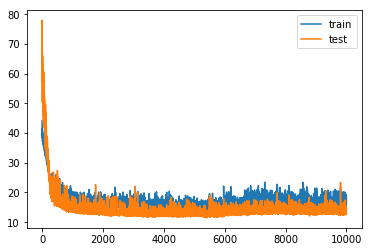

In [231]:
#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=10000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [232]:
import os
duration = 1  # second
freq = 440  # Hz
os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

0

In [233]:
yhat = model.predict(validateX)

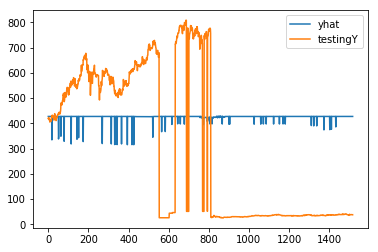

In [234]:
pyplot.plot(yhat.flatten(), label='yhat')
pyplot.plot(validateY.flatten(), label='testingY')
pyplot.legend()
pyplot.show()
#plt.axis([0,500,0,55000])

In [235]:
initial_capital = 10000
growth = []
for i in range(len(yhat)):
    print(initial_capital)
    prediction = yhat[i]
    real_value = testingY[i]
    prediction2 = yhat[i + 1]
    real_value2 = testingY[i + 1]
    if prediction2 > prediction:
        initial_capital = initial_capital * (real_value2 / real_value)
    elif prediction2 < prediction:
        initial_capital = initial_capital * (real_value / real_value2)
    growth.append(initial_capital)

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000.0
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
10311.124554762666
10568.941452630817
10414.286912834676
10414.286912834676
10414.286912834676
10414.286912834676
10414.286912834676
10414.286912834676
10414.286912834676
10414.286912834676
10414.286912834676
10414.286912834676
11166.406989553981
11290.435274880407
11290.435274880407
11290.435274880407
11290.435274880407
11290.43527488040

IndexError: index 999 is out of bounds for axis 0 with size 999

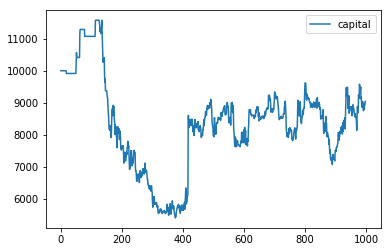

In [237]:
pyplot.plot(growth, label='capital')
pyplot.legend()
pyplot.show()

In [238]:
import numpy
numpy.savetxt("theYtests", validateY.flatten(), delimiter=",")
numpy.savetxt("theYhats", yhat.flatten(), delimiter=",")

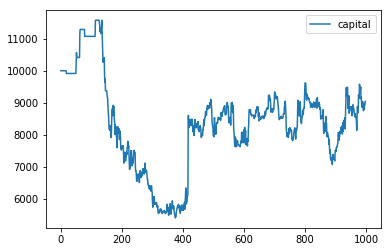

In [239]:
pyplot.plot(growth, label='capital')
pyplot.legend()
pyplot.show()

In [1]:
import os
some_new_dir = os.listdir("/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/h5models")

In [30]:
from keras.models import load_model

nombre = "TERRA13"
num = 36
model = load_model("/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/h5models/%s.h5" % (nombre))

my_data_frame_sum = all_variables.iloc[:,num]
my_data_frame = all_variables.drop(['Date', ('Adj Close.%s' % (num - 1))], axis=1)

validate_data = my_data_frame.iloc[1000:]
validate_data_sum = my_data_frame_sum.iloc[1000:]
validateX, validateY = next_batch2(validate_data.iloc[:,1:], validate_data_sum, 36)

yhat = model.predict(validateX)

import numpy
numpy.savetxt(("predictions/ypred%s" % (nombre)), validateY.flatten(), delimiter=",")
numpy.savetxt(("predictions/yhat%s" % (nombre)), yhat.flatten(), delimiter=",")

In [25]:
yhat

array([[10.583908],
       [10.57181 ],
       [10.577048],
       ...,
       [10.388045],
       [10.384221],
       [10.407638]], dtype=float32)